## Importer les jeux de données 

In [1]:
!pip install umap-learn
!pip install scikit-learn-extra
!pip install coclust

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.cluster import KMeans, AgglomerativeClustering
from coclust.clustering.spherical_kmeans import SphericalKmeans
from sklearn_extra.cluster import KMedoids

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import umap

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, silhouette_score, normalized_mutual_info_score, adjusted_rand_score

from keras.models import Model
from keras.layers import Input, Dense

from sklearn.preprocessing import LabelEncoder

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#### dataset classic3 
df1 = pd.read_csv('content/classic3.csv',usecols=['text','label'])
df1.head()

text label
0  Milestones in Cataloging In the case of the pr...  cisi
1  childhood psychosis. a description is given of...   med
2  neonatal hepatitis or familial neonatal obstru...   med
3  Handbook of Comparative Librarianship The firs...  cisi
4  Design and Evaluation of Information Systems T...  cisi

In [6]:
#### dataset classic3 
df2 = pd.read_csv('content/classic4.csv',usecols=['text','label'])
df2.shape

(7095, 2)

In [3]:
#### dataset classic3 
df3 = pd.read_csv('content/bbc.csv',usecols=['text','label'])
df3.head()

text  label
0  England coach faces rap after row\n\nEngland c...  sport
1  Moody joins up with England\n\nLewis Moody has...  sport
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport
3  Henry tipped for Fifa award\n\nFifa president ...  sport
4  Arnesen denies rift with Santini\n\nTottenham ...  sport

# Analyse exploratoire des données

In [7]:
# Y-a-t'il des articles vides dans le df1?
df1['text'].isnull().sum()

0

In [8]:
# Y-a-t'il des articles vides dans le df2?
df2['text'].isnull().sum()

0

In [9]:
# Y-a-t'il des articles vides dans le df3?
df3['text'].isnull().sum()

0

In [10]:
# les catégories présente dans le df1
df1['label'].unique()

array(['cisi', 'med', 'cran'], dtype=object)

In [11]:
# Combien d'article pour chaque catégorie dans le df1?
print("Nombre total d'article  :", df1.shape[0])
print("Nombre total d'article de catégorie cisi: ", df1[df1['label']=='cisi'].shape[0])
print("Nombre total d'article de catégorie med: ", df1[df1['label']=='med'].shape[0])
print("Nombre total d'article de catégorie cran: ", df1[df1['label']=='cran'].shape[0])


Nombre total d'article  : 3891
Nombre total d'article de catégorie cisi:  1460
Nombre total d'article de catégorie med:  1033
Nombre total d'article de catégorie cran:  1398


In [12]:
# les catégories présente dans le df2
df2['label'].unique()

array(['cacm', 'cisi', 'med', 'cran'], dtype=object)

In [13]:
# Combien d'article pour chaque catégorie dans le df2?
print("Nombre total d'article :", df2.shape[0])
print("Nombre total d'article de catégorie cacm : ", df2[df2['label']=='cacm'].shape[0])
print("Nombre total d'article de catégorie cisi: ", df2[df2['label']=='cisi'].shape[0])
print("Nombre total d'article de catégorie med: ", df2[df2['label']=='med'].shape[0])
print("Nombre total d'article de catégorie cran: ", df2[df2['label']=='cran'].shape[0])


Nombre total d'article : 7095
Nombre total d'article de catégorie cacm :  3204
Nombre total d'article de catégorie cisi:  1460
Nombre total d'article de catégorie med:  1033
Nombre total d'article de catégorie cran:  1398


In [14]:
# les catégories présente dans le df3
df3['label'].unique()

array(['sport', 'entertainment', 'tech', 'business', 'politics'],
      dtype=object)

In [15]:
# Combien d'article pour chaque catégorie dans le df3?
print("Nombre total d'article :", df3.shape[0])
print("Nombre total d'article de catégorie sport : ", df3[df3['label']=='sport'].shape[0])
print("Nombre total d'article de catégorie entertainment : ", df3[df3['label']=='entertainment'].shape[0])
print("Nombre total d'article de catégorie tech: ", df3[df3['label']=='tech'].shape[0])
print("Nombre total d'article de catégorie business: ", df3[df3['label']=='business'].shape[0])
print("Nombre total d'article de catégorie politics: ", df3[df3['label']=='politics'].shape[0])


Nombre total d'article : 2225
Nombre total d'article de catégorie sport :  511
Nombre total d'article de catégorie entertainment :  386
Nombre total d'article de catégorie tech:  401
Nombre total d'article de catégorie business:  510
Nombre total d'article de catégorie politics:  417


In [16]:
# Combien de mots dans chaque article dans df1?
word_counts1 = df1['text'].apply(lambda x: len(x.split()))
word_counts1.describe()

count    3891.000000
mean      152.007196
std        81.663476
min        10.000000
25%        93.000000
50%       136.000000
75%       192.000000
max       689.000000
Name: text, dtype: float64

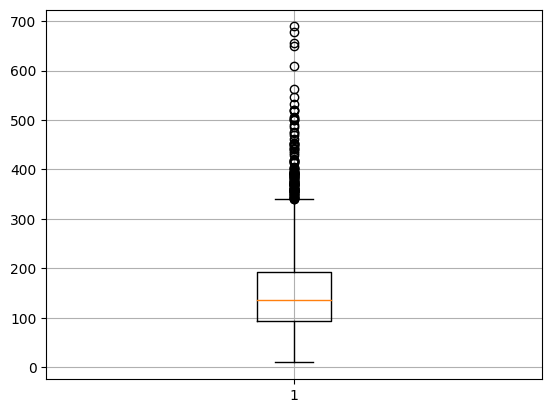

In [17]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts1.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des reviews ont entre 93 et 192 mots

In [18]:
# Combien de mots dans chaque article dans df2?
word_counts2 = df2['text'].apply(lambda x: len(x.split()))
word_counts2.describe()

count    7095.000000
mean      107.446934
std        86.970008
min         1.000000
25%        37.000000
50%        98.000000
75%       154.000000
max       689.000000
Name: text, dtype: float64

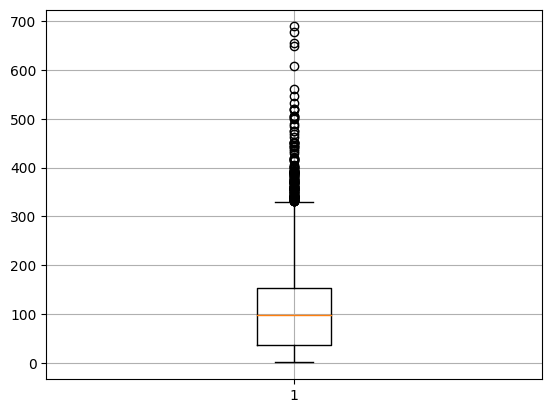

In [19]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts2.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des reviews ont entre 37 et 154 mots

In [20]:
# Combien de mots dans chaque article dans df3?
word_counts3 = df3['text'].apply(lambda x: len(x.split()))
word_counts3.describe()

count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: text, dtype: float64

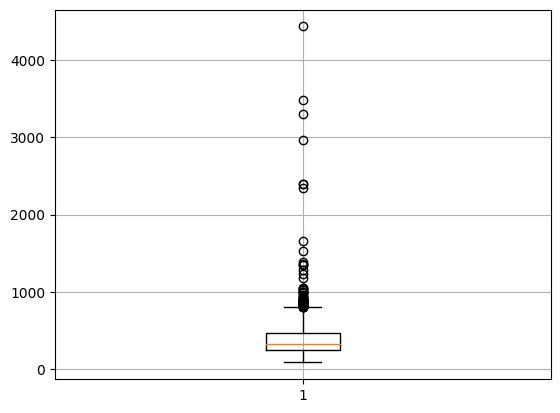

In [21]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts3.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des articles ont entre 246 et 471 mots

# Pré-traitement des données textuelles 

On enchaîne dans la fonction data_preprocessing les méthodes de nettoyage classiques.
* Suppression des tag HTML
* Conservation des mots uniquement
* Passage en minuscule
* Suppression des mots vides
* Tokenization
* Lemmatisation
* Réassemblage des articles

In [22]:
import re
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # définir les stop_words
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # nettoyage des données
  article = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  article =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # miniscule
  article = article.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(article) # converts articles to tokens
  
  # stop_words removal
  article = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  article = [lemmatizer.lemmatize(word) for word in article]
  
  # join words in preprocessed review
  article = ' '.join(article)
  
  return article

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
# On applique le pré-traitement à nos données df1
df1['preprocessed_review'] = df1['text'].apply(lambda article: data_preprocessing(article))
df1.head()

text label  \
0  Milestones in Cataloging In the case of the pr...  cisi   
1  childhood psychosis. a description is given of...   med   
2  neonatal hepatitis or familial neonatal obstru...   med   
3  Handbook of Comparative Librarianship The firs...  cisi   
4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  
0  milestone cataloging case present study dr leh...  
1  childhood psychosis description given diagnost...  
2  neonatal hepatitis familial neonatal obstructi...  
3  handbook comparative librarianship first part ...  
4  design evaluation information system co joinin...

In [24]:
# On applique le pré-traitement à nos données df2
df2['preprocessed_review'] = df2['text'].apply(lambda article: data_preprocessing(article))
df2.head()

text label  \
0  Computer-Aided Analysis and Design of Informat...  cacm   
1  Milestones in Cataloging In the case of the pr...  cisi   
2  childhood psychosis. a description is given of...   med   
3  neonatal hepatitis or familial neonatal obstru...   med   
4  Handbook of Comparative Librarianship The firs...  cisi   

                                 preprocessed_review  
0  computer aided analysis design information sys...  
1  milestone cataloging case present study dr leh...  
2  childhood psychosis description given diagnost...  
3  neonatal hepatitis familial neonatal obstructi...  
4  handbook comparative librarianship first part ...

In [25]:
# On applique le pré-traitement à nos données df3
df3['preprocessed_review'] = df3['text'].apply(lambda article: data_preprocessing(article))
df3.head()

text  label  \
0  England coach faces rap after row\n\nEngland c...  sport   
1  Moody joins up with England\n\nLewis Moody has...  sport   
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport   
3  Henry tipped for Fifa award\n\nFifa president ...  sport   
4  Arnesen denies rift with Santini\n\nTottenham ...  sport   

                                 preprocessed_review  
0  england coach face rap row england coach andy ...  
1  moody join england lewis moody flown dublin jo...  
2  ferguson fear milan cutting edge manchester un...  
3  henry tipped fifa award fifa president sepp bl...  
4  arnesen denies rift santini tottenham sporting...

# df1 (CLASSIC3)

## Partie 1 : Approche Tandem

In [81]:
df1.head()

text label  \
0  Milestones in Cataloging In the case of the pr...  cisi   
1  childhood psychosis. a description is given of...   med   
2  neonatal hepatitis or familial neonatal obstru...   med   
3  Handbook of Comparative Librarianship The firs...  cisi   
4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  
0  milestone cataloging case present study dr leh...  
1  childhood psychosis description given diagnost...  
2  neonatal hepatitis familial neonatal obstructi...  
3  handbook comparative librarianship first part ...  
4  design evaluation information system co joinin...

### glove.840B.300d


In [ ]:
# from google.colab import auth
# auth.authenticate_user()
# from google.colab import drive
# drive.mount('/content/drive')
# # Décompression du dossier de vecteurs GloVe pré-entraînés
# !unzip "/content/drive/MyDrive/glove.840B.300d.zip" -d "/content/drive/MyDrive/glove.840B.300d"

In [ ]:
# import os
# # Global parameters
# #root folder
# root_folder='/content/drive/MyDrive/'
# data_folder_name='glove.840B.300d'
# glove_filename='glove.840B.300d.txt'

# #train_filename='train.csv'
# # Variable for data directory
# DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
# glove_path = os.path.abspath(os.path.join(DATA_PATH, glove_filename))

# # Both train and test set are in the root data directory
# train_path = DATA_PATH
# test_path = DATA_PATH

# #Relevant columns
# TEXT_COLUMN = 'text'
# TARGET_COLUMN = 'target'

In [ ]:
# # Nous avons juste à executer ce code une fois, la fonction glove2word2vec 
# # sauvegarde les embeddings GloVe au format word2vec. 
# # that will be loaded in the next section
# from gensim.scripts.glove2word2vec import glove2word2vec

# #glove_input_file = glove_filename
# word2vec_output_file = glove_filename+'.word2vec'
# glove2word2vec(glove_path, word2vec_output_file)

In [ ]:
# from gensim.models import KeyedVectors
# # On charge le modèle GloVe
# word2vec_output_file = glove_filename+'.word2vec'
# model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

### glove.6B.100d

In [84]:
# Global parameters
#root folder
root_folder='/content/'
data_folder_name=''
glove_filename='glove.6B.100d.txt'

#train_filename='train.csv'
# Variable for data directory
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
glove_path = os.path.abspath(os.path.join(DATA_PATH, glove_filename))

# Both train and test set are in the root data directory
train_path = DATA_PATH
test_path = DATA_PATH

#Relevant columns
TEXT_COLUMN = 'text'
TARGET_COLUMN = 'target'

In [85]:
# Nous avons juste à executer ce code une fois, la fonction glove2word2vec 
# sauvegarde les embeddings GloVe au format word2vec. 
# that will be loaded in the next section


#glove_input_file = glove_filename
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)

(13452, 100)

In [87]:
#from gensim.models import KeyedVectors
# On charge le modèle GloVe
word2vec_output_file = glove_filename+'.word2vec'
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [88]:
embeddings = []
for text in df1['preprocessed_review']:
    words = text.split()
    embedding = np.mean([model.get_vector(w) for w in words if w in model.key_to_index], axis=0)
    embeddings.append(embedding)

df1_embeddings = pd.DataFrame(embeddings)
df1_embeddings['label'] = df1['label']

In [89]:
true_labels=df1_embeddings['label']

### K-Means++:

#### sur l’espace d’origine:

In [90]:
# Set the number of clusters
n_clusters = 3

# Initialize the KMeans model with KMeans++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

# Fit the model on the data
kmeans.fit(df1_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [91]:
#from utils import cluster_acc

#acc_kpp_org = cluster_acc(true_labels, kmeans_labels)      
nmi_kpp_org = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_org = adjusted_rand_score(true_labels, kmeans_labels)

#print("ACC", acc_kpp_org)
print("NMI:", nmi_kpp_org)
print("ARI:", ari_kpp_org)

NMI: 0.7982918879978377
ARI: 0.856134763766726


#### sur l’espace réduit avec l'ACP:





**Elbow method:**

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

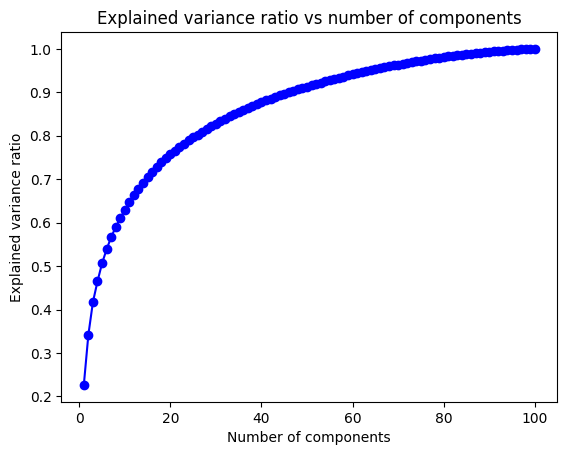

In [92]:
pca = PCA()

# Fit PCA on embeddings
pca.fit(df1_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 20 composantes qui expliquent plus de 70% de la variance. Au-delà de 20, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 20.

In [93]:
# Define the number of components to keep
n_components = 20

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df1_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df1_pca = pd.DataFrame(pca.transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_pca['label'] = df1_embeddings['label']

# Rename columns
df1_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

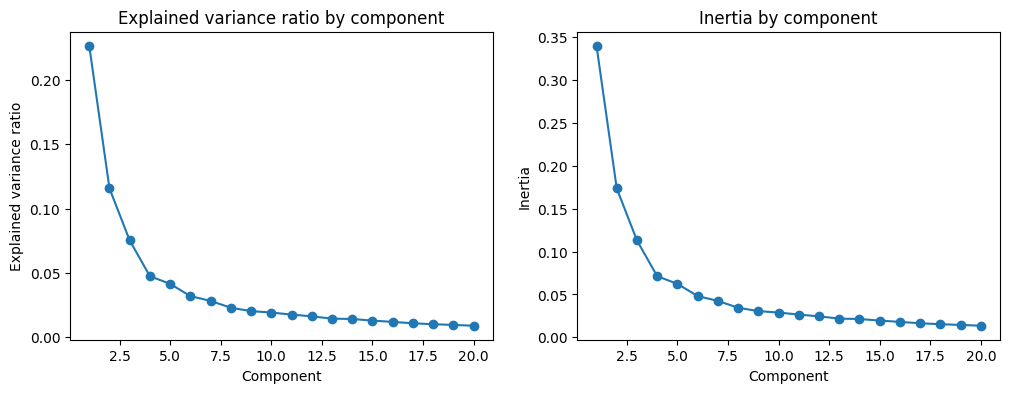

In [94]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

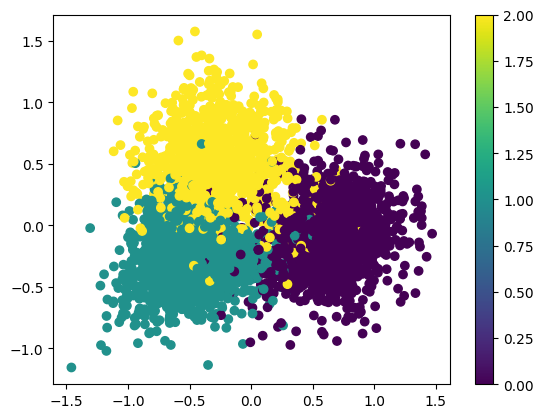

In [95]:
# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df1_pca['label'] = le.fit_transform(df1_pca['label'])

# Plot scatter plot
plt.scatter(df1_pca['PC1'], df1_pca['PC2'], c=df1_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 20 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons clairement distinguer les trois groupes.

In [96]:
# Fit the model on the data
kmeans.fit(df1_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

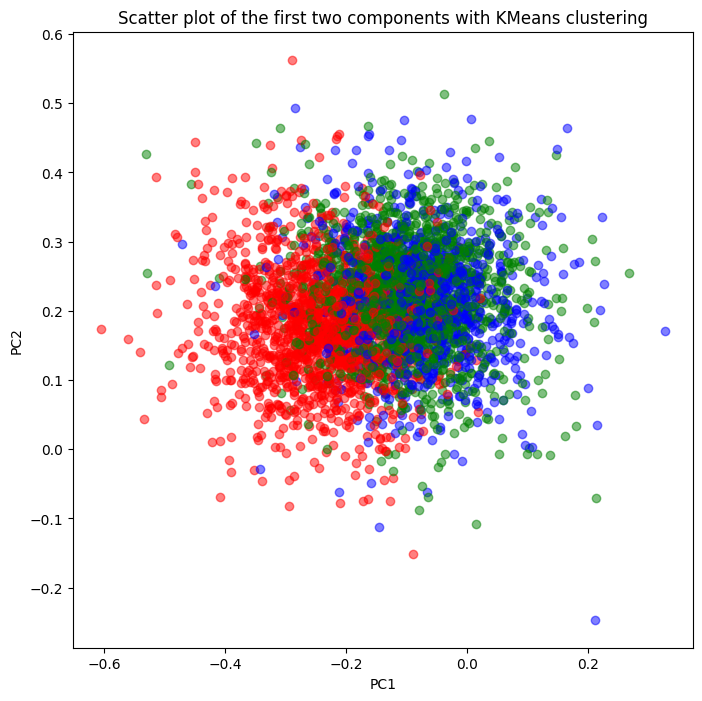

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(kmeans_labels)):
    if kmeans_labels[i] == 0:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='r', alpha=0.5)
    elif kmeans_labels[i] == 1:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='g', alpha=0.5)
    elif kmeans_labels[i] == 2:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='b', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of the first two components with KMeans clustering')
plt.show()

In [98]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_pca)
print("ARI:", ari_kpp_pca)

NMI: 0.7960481172458098
ARI: 0.8546773780219664


#### sur l’espace réduit avec t-SNE:

Le t-SNE est une méthode de réduction de dimensionnalité qui diffère de la PCA en ce qu'elle vise à conserver les structures de proximité non linéaires dans les données. Cette méthode est souvent utilisée pour la visualisation de données en deux ou trois dimensions, car elle est particulièrement utile pour la détection des relations non linéaires entre les points de données. En comparaison avec la PCA, le t-SNE a une complexité de calcul plus élevée et est plus lent à exécuter, mais peut être plus utile dans certains scénarios où la relation entre les données est non linéaire. Nous allons donc essayer de réduire les dimensions de nos données avec t-SNE pour voir si cela peut améliorer notre clustering.

In [99]:
# Initialize t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform t-SNE on embeddings
df1_tsne = pd.DataFrame(tsne.fit_transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_tsne['label'] = df1_embeddings['label']

# Rename columns
df1_tsne.columns = ['x', 'y', 'label']

In [100]:
df1_tsne

x          y label
0     37.913033   0.914006  cisi
1    -11.025805  22.164501   med
2     -8.029661  19.205446   med
3     38.135475  11.848845  cisi
4     31.494774 -16.090765  cisi
...         ...        ...   ...
3886   8.140410  19.684631   med
3887  23.839144   4.866907  cisi
3888  37.217899  24.424698  cisi
3889 -43.548512   1.409051  cran
3890   4.331800  34.278484   med

[3891 rows x 3 columns]

In [101]:
# Fit KMeans on t-SNE embeddings
kmeans.fit(df1_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

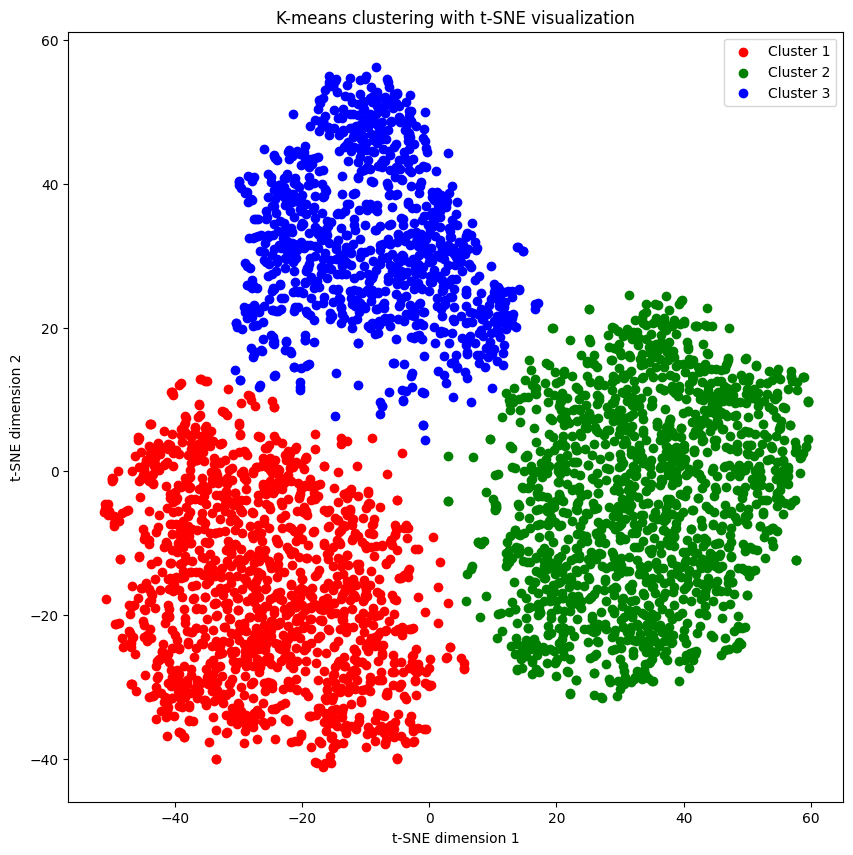

In [102]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Loop over each cluster and plot the points
for i in range(3):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df1_tsne.iloc[cluster_indices]['x'], 
               df1_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les trois clusters. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit. Cependant, le choix du nombre optimal de composantes reste un défi pour t-SNE, car il dépend des données et peut nécessiter des tests empiriques.

In [103]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_tsne)
print("ARI:", ari_kpp_tsne)

NMI: 0.8729104008941279
ARI: 0.921478787941443


On constate que les scores NMI et ARI pour les clusters de k-means++ appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

#### sur l’espace réduit avec UMAP:

UMAP (Uniform Manifold Approximation and Projection) est une méthode de réduction de dimensionnalité non linéaire qui vise à préserver la structure globale des données. Contrairement aux méthodes de réduction de dimensionnalité linéaires telles que PCA et t-SNE, UMAP utilise une approche probabiliste basée sur la théorie de l'information pour créer une représentation en deux ou trois dimensions des données. UMAP est particulièrement utile pour les données complexes et non linéaires, et peut être utilisé pour la visualisation, la clustering, la détection d'anomalies et d'autres applications d'apprentissage automatique. Nous allons donc l'utiliser pour voir si cette méthode permet d'obtenir des résultats encore meilleurs que ceux obtenus avec PCA et t-SNE.

In [105]:
# Define the number of components to keep
n_components = 20

# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df1_umap = pd.DataFrame(umap_obj.fit_transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_umap['label'] = df1_embeddings['label']

# Rename columns
df1_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [106]:
# Fit KMeans on Umap embeddings
kmeans.fit(df1_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [107]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_umap)
print("ARI:", ari_kpp_umap)

NMI: 0.8757062954530704
ARI: 0.9215138213507855


On constate que les scores NMI et ARI obtenus avec l'algorithme de clustering K-means appliqué sur les embeddings UMAP sont similaires à ceux obtenus avec les embeddings t-SNE. Cela peut s'expliquer par le fait que les deux algorithmes de réduction de dimensionnalité sont conçus pour maintenir les relations spatiales entre les points. En d'autres termes, la structure de similarité des données est préservée dans les embeddings produits par UMAP et t-SNE, ce qui permet aux algorithmes de clustering d'effectuer des regroupements similaires. Il convient de noter que la performance de l'algorithme de clustering dépend également de la qualité de la représentation des données en entrée, ainsi que des paramètres d'hyperparamètres spécifiques tels que le nombre de clusters et la métrique de similarité utilisée.

#### sur l’espace réduit avec un Autoencodeur: 

Après avoir essayé les méthodes traditionnelles de réduction de dimension comme l'ACP, le t-SNE et l'UMAP, il peut être intéressant d'essayer l'autoencodeur pour réduire la dimensionnalité de nos données. Contrairement aux méthodes traditionnelles qui se basent sur des projections linéaires ou non linéaires, l'autoencodeur utilise une architecture de réseau de neurones qui peut capturer des relations non linéaires et des interactions complexes entre les variables. Cela peut donner lieu à un espace de représentation plus discriminant et peut-être mieux adapté pour la tâche de clustering. De plus, les autoencodeurs ont la capacité d'apprendre des représentations latentes des données, ce qui peut nous aider à comprendre les caractéristiques sous-jacentes des données qui ont un impact sur la similarité entre les observations.

In [108]:
# Normalize data
df1_norm = (df1_embeddings.iloc[:, :-1] - df1_embeddings.iloc[:, :-1].mean()) / df1_embeddings.iloc[:, :-1].std()

# Define input shape
input_shape = df1_norm.shape[1]

# Define encoding dimension
encoding_dim = 20

# Define input layer
input_layer = Input(shape=(input_shape,))

# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)

# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder model
autoencoder.fit(df1_norm, df1_norm, epochs=100, batch_size=32, verbose=0)

# Define encoder model
encoder = Model(input_layer, encoding_layer)

# Encode data
df1_encoded = pd.DataFrame(encoder.predict(df1_norm))

# Add label column to the new dataframe
df1_encoded['label'] = df1_embeddings['label']

# Rename columns
df1_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

122/122 [==============================] - 0s 2ms/step


In [109]:
# Fit KMeans on this embeddings
kmeans.fit(df1_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [110]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_auto)
print("ARI:", ari_kpp_auto)

NMI: 0.5113970937748359
ARI: 0.5651403314078531


Nous avons constaté que l'ARI et le NMI ont diminué après avoir appliqué l'autoencodeur pour réduire la dimensionnalité des embeddings. Cela peut être dû au fait que l'autoencodeur est un algorithme non linéaire, et donc peut introduire des non-linéarités qui ne sont pas forcément utiles pour le clustering. De plus, l'autoencodeur peut ne pas être en mesure de capturer les structures intrinsèques des données aussi bien que les autres algorithmes tels que l'ACP, le t-SNE et l'UMAP. En conséquence, la qualité de la représentation de clustering peut être dégradée avec l'utilisation de l'autoencodeur pour la réduction de la dimensionnalité.

### Kmedoids:

Il est intéressant d'essayer de refaire le travail sur l'espace originale et les espaces réduits par les différentes méthodes avec Kmedoids à la place de Kmeans++ car Kmedoids est une méthode de clustering robuste qui peut être plus adaptée aux données non linéaires et non convexes. Contrairement à Kmeans++, qui utilise des centres de cluster virtuels pour le clustering, Kmedoids utilise des exemples réels comme centres de cluster. Cette approche peut être plus adaptée pour les espaces réduits qui peuvent avoir des formes non convexes et non linéaires. En outre, l'utilisation de Kmedoids peut nous donner une meilleure compréhension de la structure des données et de la qualité de notre clustering, car les centres de cluster sont des points de données réels et non virtuels, ce qui peut nous aider à interpréter les résultats de clustering de manière plus intuitive.

#### sur l’espace d’origine:

In [112]:
# Set the number of clusters
n_clusters = 3

# Initialize the KMedoids model with random initialization
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)

# Fit the model on the data
kmedoids.fit(df1_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [113]:
nmi_kmoids_org = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_org = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_org)
print("ARI:", ari_kmoids_org)

NMI: 0.6572219435188744
ARI: 0.7338856574424132


Lorsque nous avons appliqué K-medoids sur l'espace original des embeddings, nous avons obtenu des valeurs de NMI et ARI beaucoup plus faibles que celles obtenues avec K-means. 

#### sur l’espace réduit avec l'ACP:

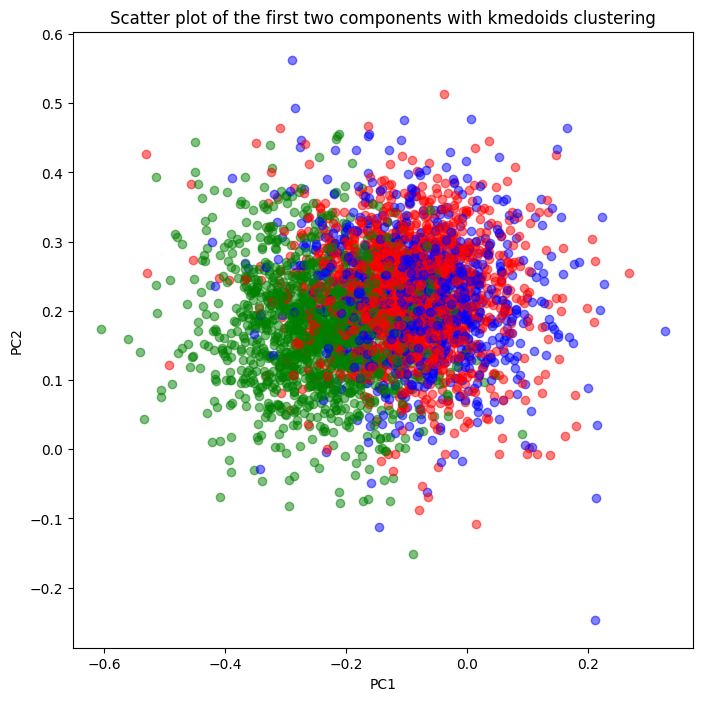

In [114]:
# Fit the model on the data
kmedoids.fit(df1_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(kmedoids_labels)):
    if kmedoids_labels[i] == 0:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='r', alpha=0.5)
    elif kmedoids_labels[i] == 1:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='g', alpha=0.5)
    elif kmedoids_labels[i] == 2:
        ax.scatter(df1_embeddings.iloc[i, 0], df1_embeddings.iloc[i, 1], c='b', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of the first two components with kmedoids clustering')
plt.show()

In [115]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_pca)
print("ARI:", ari_kmoids_pca)

NMI: 0.7173945403245042
ARI: 0.7965291414997531


Lorsque nous avons appliqué PCA pour réduire la dimensionnalité des embeddings de notre dataset, nous avons observé des améliorations significatives de l'ARI et du NMI par rapport à l'espace original. Cela peut être dû au fait que PCA cherche à maximiser la variance dans les dimensions principales, ce qui peut permettre de capturer les caractéristiques les plus importantes des données pour la tâche de clustering.

 En utilisant KMedoids avec la distance euclidienne sur l'espace de PCA, nous avons pu obtenir des clusters plus cohérents et plus distincts, ce qui a entraîné des scores plus élevés pour ARI et NMI.

#### sur l’espace réduit avec t-SNE:

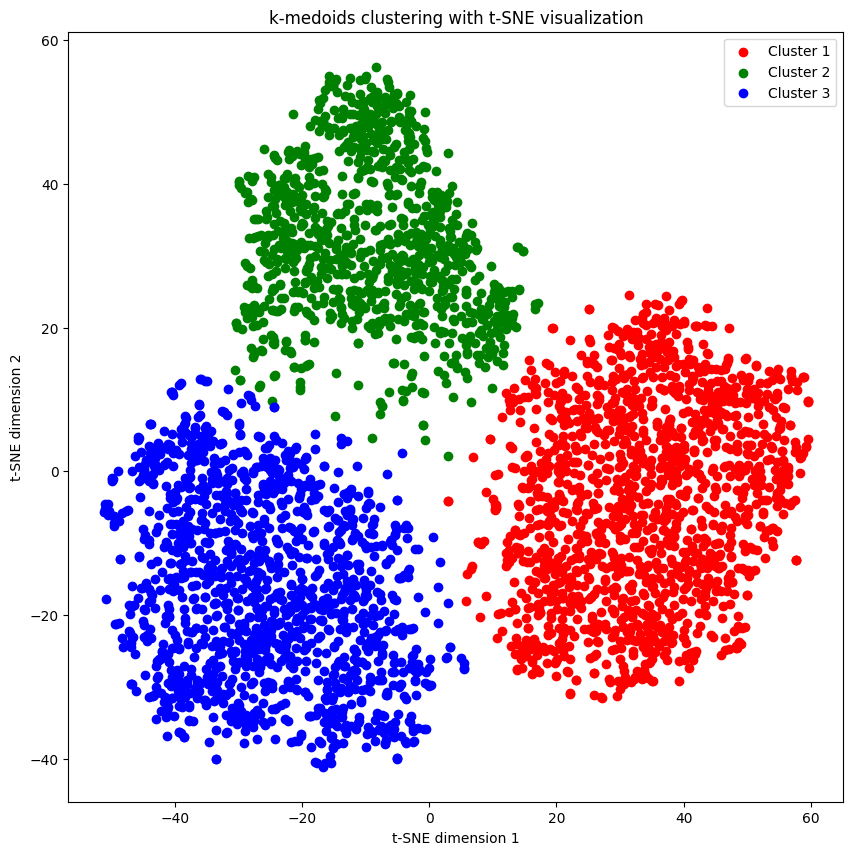

In [116]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df1_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Loop over each cluster and plot the points
for i in range(3):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df1_tsne.iloc[cluster_indices]['x'], 
               df1_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('k-medoids clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [117]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_tsne)
print("ARI:", ari_kmoids_tsne)

NMI: 0.8736002127355543
ARI: 0.9221439992643142


Nous avons également constaté que les résultats de Kmedoids étaient meilleurs avec t-SNE qu'avec PCA en termes de NMI et d'ARI. Les résultats ont montré que la visualisation t-SNE a permis de mieux séparer les classes, ce qui a conduit à une meilleure performance de Kmedoids pour la classification non supervisée. En revanche, avec PCA, les classes ont tendance à se chevaucher, ce qui rend la tâche de classification plus difficile.

#### sur l’espace réduit avec UMAP:

In [118]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df1_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [119]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_umap)
print("ARI:", ari_kmoids_umap)

NMI: 0.8757062954530705
ARI: 0.9215138213507855


De même, avec UMAP, nous avons également constaté des performances similaires à celles de t-SNE en termes de NMI et d'ARI. Cela montre que UMAP est également une méthode efficace pour la réduction de dimensionnalité et peut être utilisé avec succès pour le clustering de données.

#### sur l’espace réduit avec un Autoencodeur:

In [120]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df1_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [121]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_auto)
print("ARI:", ari_kmoids_auto)

NMI: 0.23435564609122506
ARI: 0.2387601886690559


Il semble que les résultats de NMI et ARI obtenus avec l'autoencodeur soient très faibles. Cela peut être dû à plusieurs facteurs, notamment:

1.   Le choix de la taille de l'espace latent (encoding_dim) peut ne pas être optimal pour la tâche de clustering.


2.   Le choix de la fonction de perte (loss) peut ne pas être adapté à la tâche de clustering.


3. Le nombre d'itérations d'entraînement (epochs) peut ne pas être suffisant pour que le modèle capture correctement les structures dans les données.
Il peut être intéressant d'expérimenter avec différentes valeurs pour ces paramètres et de voir si les résultats s'améliorent.

### spherical Kmeans:

Nous allons maintenant refaire toutes les étapes avec l'algorithme de clustering Spherical KMeans, après avoir utilisé KMeans++ et KMedoids sur tous les espaces que nous avons explorés précédemment. Nous verrons si les résultats de clustering sont meilleurs ou pires avec cette méthode de clustering par rapport à KMeans et KMedoids.

#### sur l’espace d’origine:

In [122]:
!pip install coclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
from coclust.clustering.spherical_kmeans import SphericalKmeans

# Set the number of clusters
n_clusters = 3

# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)

# Convert DataFrame to NumPy array
X = df1_embeddings.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_org = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_org = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_org)
print("ARI:", ari_ksph_org)

 == New init == 
iteration: 0
3645.320817392179
iteration: 1
3697.1810715372576
iteration: 2
3706.587484363822
iteration: 3
3708.5538220456874
iteration: 4
3708.7471689389895
iteration: 5
3708.7681122700697
iteration: 6
3708.768730042909
iteration: 7
NMI: 0.796647895364159
ARI: 0.853849308809073


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids.

 En effet, la méthode Spherical KMeans a une approche différente de la méthode KMedoids en termes de choix des centroids initiaux et de la distance utilisée pour regrouper les données. Spherical KMeans utilise une distance cosinus normalisée pour prendre en compte la similarité entre les données, ce qui est particulièrement utile pour des données textuelles. Par conséquent, il est plus adapté pour regrouper des données textuelles que la méthode KMedoids qui utilise une distance euclidienne.

#### sur l’espace réduit avec l'ACP:

In [124]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_pca.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_pca)
print("ARI:", ari_ksph_pca)

 == New init == 
iteration: 0
756.9208658354432
iteration: 1
2198.639684262132
iteration: 2
2323.7945686431303
iteration: 3
2332.3008931534623
iteration: 4
2333.229099101934
iteration: 5
2333.273313801279
iteration: 6
2333.274726737784
iteration: 7
NMI: 0.8057642865299905
ARI: 0.8627447300209924


#### sur l’espace réduit avec t-SNE:

In [125]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_tsne)
print("ARI:", ari_ksph_tsne)

 == New init == 
iteration: 0
2662.3216025875563
iteration: 1
3534.247254517237
iteration: 2
3544.5394191722244
iteration: 3
3544.60174404261
iteration: 4
NMI: 0.875699650097521
ARI: 0.9235190120614378


#### sur l’espace réduit avec UMAP:

In [126]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_umap.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_umap)
print("ARI:", ari_ksph_umap)

 == New init == 
iteration: 0
3834.085608207003
iteration: 1
3886.23925934788
iteration: 2
3886.6429306841274
iteration: 3
3886.6429421457515
iteration: 4
NMI: 0.8757062954530707
ARI: 0.9215138213507855


#### sur l’espace réduit avec un Autoencodeur:

In [127]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_encoded.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_auto = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_auto = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_auto)
print("ARI:", ari_ksph_auto)

 == New init == 
iteration: 0
3554.0599219756737
iteration: 1
3621.266097621055
iteration: 2
3634.3904251277145
iteration: 3
3635.4211424421055
iteration: 4
3635.4717113884794
iteration: 5
3635.4756670162287
iteration: 6
3635.4764415521277
iteration: 7
3635.476677058359
iteration: 8
NMI: 0.8033834039406386
ARI: 0.860719385013525


En résumé, après avoir appliqué SphericalKMeans sur les données en utilisant à la fois l'espace original et les espaces réduits générés par UMAP et t-SNE, nous avons constaté que le SphericalKMeans avait de bons résultats sur tous les espaces, tandis que UMAP et t-SNE ont produit des espaces avec des ARI et des NMI plus élevés pour tous les algorithmes. En particulier, UMAP et t-SNE ont donné les meilleurs résultats pour l'ARI et le NMI sur l'espace réduit.

### CAH:

Il peut être intéressant d'appliquer la classification hiérarchique ascendante (CAH) aux différents espaces de données que nous avons réduits, après avoir utilisé les méthodes de clustering k-means, k-medoids et spherical k-means. L'application de CAH peut permettre d'obtenir une vue plus globale des données en regroupant les différents clusters formés par les méthodes de clustering en sous-groupes plus larges, ce qui peut aider à mieux comprendre la structure des données.

Pour chaque espace (original et réduit par différentes méthodes), nous allons appliquer la CAH avec chacune des méthodes d'agrégation disponibles: 

1. La méthode de liaison simple (single linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus proches.

2. La méthode de liaison complète (complete linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus éloignés.

3. La méthode de liaison moyenne (average linkage) : fusionne les clusters qui ont la plus petite distance moyenne entre tous leurs membres.

4. La méthode de Ward : minimise la variance totale des clusters fusionnés.

De cette façon, nous pourrons comparer les performances des différentes méthodes d'agrégation et trouver la méthode qui donne les meilleurs résultats pour chaque espace.

#### sur l'espace d'origine:

In [128]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")


Linkage method: ward
ARI score: 0.7942211420322772
NMI score: 0.7405579747416696
-------------------------------
Linkage method: complete
ARI score: 0.34226214092638707
NMI score: 0.4361107216449743
-------------------------------
Linkage method: average
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------
Linkage method: single
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------


#### sur l'espace réduit avec l"ACP:

In [129]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.8797800178241114
NMI score: 0.8199907825245987
-------------------------------
Linkage method: complete
ARI score: 0.4882849250262292
NMI score: 0.5260047513354402
-------------------------------
Linkage method: average
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------
Linkage method: single
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------


#### sur l'espace réduit avec t-SNE:

In [130]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.9153374798341316
NMI score: 0.8635165032615701
-------------------------------
Linkage method: complete
ARI score: 0.8371727867285258
NMI score: 0.7869556448914783
-------------------------------
Linkage method: average
ARI score: 0.9236203696568164
NMI score: 0.8723422313525847
-------------------------------
Linkage method: single
ARI score: 0.0004110310645999536
NMI score: 0.0034370316164610937
-------------------------------


#### sur l'espace réduit avec UMAP:

In [131]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.9215138213507855
NMI score: 0.8757062954530704
-------------------------------
Linkage method: complete
ARI score: 0.9215138213507855
NMI score: 0.8757062954530707
-------------------------------
Linkage method: average
ARI score: 0.9215138213507855
NMI score: 0.8757062954530704
-------------------------------
Linkage method: single
ARI score: 0.9215138213507855
NMI score: 0.8757062954530705
-------------------------------


En effet, dans l'espace réduit par UMAP, nous observons que les résultats des quatre méthodes de liaison sont très similaires, avec des scores ARI et NMI élevés pour toutes les méthodes. Cela peut être dû au fait que cette distribution de données est bien séparée et que l'effet de chaîne n'est peut-être pas présent, ce qui rend les résultats moins sensibles au choix de la méthode de liaison. De plus, il est possible que la méthode de lien Single donne des résultats catastrophiques pour les autres espaces, car elle peut être très sensible aux valeurs aberrantes et à l'existence de groupes dispersés. Dans cet espace réduit par UMAP, il se peut que ces facteurs n'affectent pas autant la performance de la méthode de liaison Single, conduisant ainsi à des résultats similaires à ceux des autres méthodes de liaison.

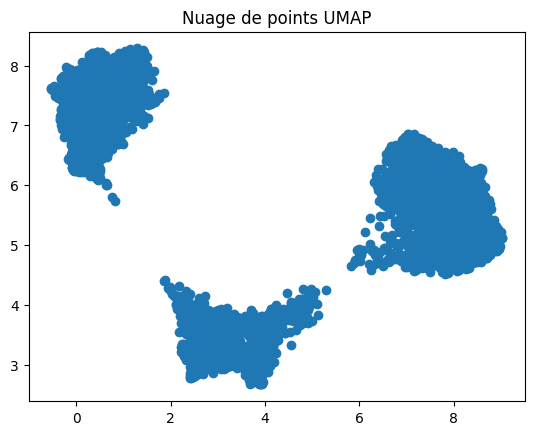

In [132]:
plt.scatter(df1_umap.iloc[:, 0], df1_umap.iloc[:, 1])
plt.title("Nuage de points UMAP")
plt.show()

#### sur l'espace réduit avec un Autoencodeur:

In [133]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.8475537469140701
NMI score: 0.7862666425254462
-------------------------------
Linkage method: complete
ARI score: 0.09764784231570725
NMI score: 0.18296018323689167
-------------------------------
Linkage method: average
ARI score: -6.544513969819096e-05
NMI score: 0.002091303873983651
-------------------------------
Linkage method: single
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original et dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, il est important de noter que la méthode de liaison "single" a obtenu les pires résultats dans toutes les situations. Ceci peut être dû à l'effet de chaîne, où chaque nouvel élément est fusionné avec le groupe le plus proche, sans tenir compte de la structure globale des données. Les meilleurs résultats ont été obtenus dans l'espace réduit par UMAP et t-SNE, comme pour les autres méthodes de clustering.

En somme, les résultats de la CAH ont montré que la méthode de liaison "ward" est la plus appropriée pour les données de notre ensemble de données, et que les espaces réduits par UMAP et t-SNE offrent des résultats de clustering similaires aux autres méthodes. Ces résultats suggèrent que la combinaison de techniques de réduction de dimensionnalité et de clustering peut être une approche efficace pour explorer la structure de données complexes et faciliter l'analyse de grandes quantités de données.

In [134]:
# récuperer les meilleurs scores pour chaque espace.

ari_cah_org=0.8319385753154184
nmi_cah_org=0.7625175223377796
ari_cah_pca=0.9050986432151361
nmi_cah_pca=0.852800534469963
ari_cah_tsne=0.9290406898699806
nmi_cah_tsne=0.8853885296923147
ari_cah_umap=0.9280528915687931
nmi_cah_umap=0.8828530430216412
ari_cah_auto=0.6314102210824222
nmi_cah_auto=0.6026506652197342

### Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [135]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['org', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method       CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                      
auto    0.631410  0.238760  0.565140        0.860719  0.602651  0.234356   
org     0.831939  0.733886  0.856135        0.853849  0.762518  0.657222   
pca     0.905099  0.796529  0.854677        0.862745  0.852801  0.717395   
tsne    0.929041  0.922144  0.921479        0.923519  0.885389  0.873600   
umap    0.928053  0.921514  0.921514        0.921514  0.882853  0.875706   

                                  
method  KMeans++ KMeansSpherical  
space                             
auto    0.511397        0.803383  
org     0.798292        0.796648  
pca     0.796048        0.805764  
tsne    0.872910        0.875700  
umap    0.875706        0.875706

<Figure size 1000x600 with 0 Axes>

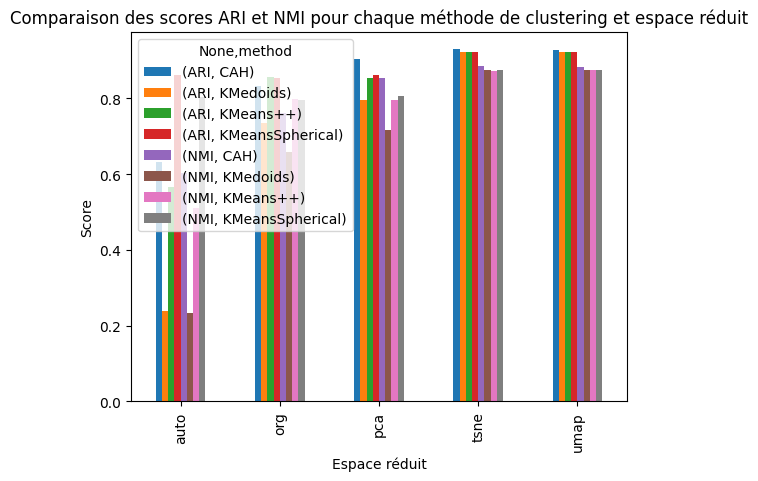

In [136]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode "spherical KMeans" a donné les meilleurs résultats en termes de scores ARI et NMI pour la plupart des espaces réduits. Cela peut s'expliquer par le fait que cette méthode est capable de gérer les clusters de forme non sphérique, contrairement à la méthode standard KMeans qui suppose que les clusters sont sphériques. Ainsi, cette méthode a pu mieux capturer la structure des données et obtenir des clusters plus précis et plus homogènes.



### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode Spherical KMeans dans l'espace T-SNE, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

 == New init == 
iteration: 0
2662.3216025875563
iteration: 1
3534.247254517237
iteration: 2
3544.5394191722244
iteration: 3
3544.60174404261
iteration: 4


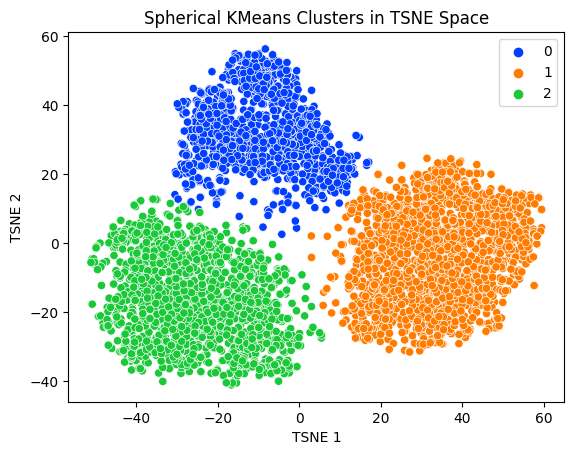

In [137]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df1_tsne.iloc[:, 0], y=df1_tsne.iloc[:, 1], hue=spherical_kmeans_labels, palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Spherical KMeans Clusters in TSNE Space')

# Show the plot
plt.show()

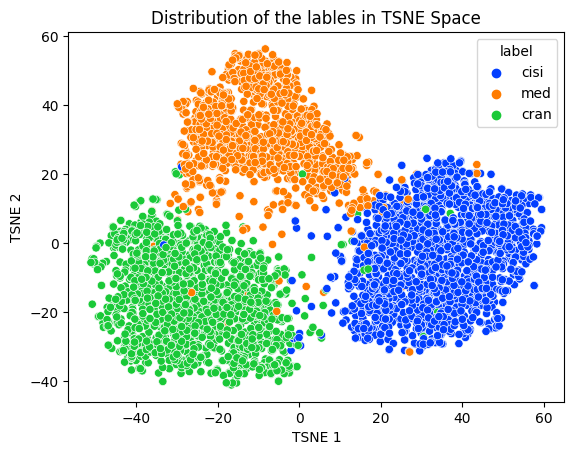

In [138]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df1_tsne.iloc[:, 0], y=df1_tsne.iloc[:, 1], hue=df1_tsne['label'], palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Distribution of the lables in TSNE Space')

# Show the plot
plt.show()

En examinant les deux nuages de points, nous pouvons remarquer que les points du **cluster 0** sont principalement concentrés dans la partie supérieure du graphique. Ce cluster correspond à la classe **"med"** dans la variable **"label"** de notre dataframe. De même, les points du **cluster 1** sont principalement regroupés dans la partie inférieure gauche du graphique, correspondant à la classe **"cisi"**. Enfin, les points du **cluster 2** sont concentrés dans la partie inférieure droite du graphique, correspondant à la classe **"cran"**. Ces observations indiquent que le clustering a réussi à regrouper les données en fonction de leur appartenance à l'une des trois classes de la variable "label". Cela montre que le modèle de clustering Spherical KMeans appliqué sur l'espace TSNE a été efficace pour séparer les données en fonction de leurs caractéristiques, en permettant d'identifier des groupes similaires au sein de chaque classe.

In [139]:
df1['cluster']=spherical_kmeans_labels
df1.head()

text label  \
0  Milestones in Cataloging In the case of the pr...  cisi   
1  childhood psychosis. a description is given of...   med   
2  neonatal hepatitis or familial neonatal obstru...   med   
3  Handbook of Comparative Librarianship The firs...  cisi   
4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  cluster  
0  milestone cataloging case present study dr leh...        1  
1  childhood psychosis description given diagnost...        0  
2  neonatal hepatitis familial neonatal obstructi...        0  
3  handbook comparative librarianship first part ...        1  
4  design evaluation information system co joinin...        1

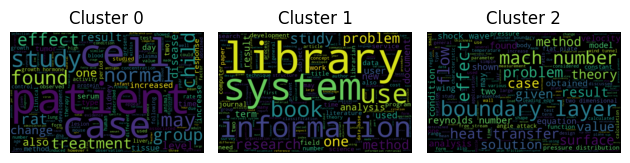

In [140]:
# Définir les trois clusters
clusters = [0, 1, 2]

# Boucle pour créer les nuages de mots pour chaque cluster
for i, c in enumerate(clusters):
    
    # Sélectionner les reviews du cluster
    words_list = df1[df1['cluster'] == c]['preprocessed_review'].unique().tolist()
    words = " ".join(words_list)
    
    # Créer le nuage de mots pour le cluster
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(words)
    
    # Créer le subplot correspondant au cluster
    plt.subplot(1, 3, i+1)
    
    # Afficher le nuage de mots sur le subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    
# Afficher la figure
plt.tight_layout()
plt.show()

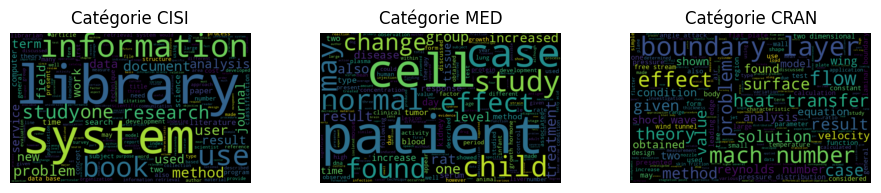

In [141]:
# Define the categories
categories = df1['label'].unique()

# Create a dictionary to store the word clouds for each category
wordclouds = {}

# Loop through the categories and create a word cloud for each one
for category in categories:
    words_list = df1[df1['label'] == category]['preprocessed_review'].unique().tolist()
    pos_words = " ".join(words_list)
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)
    wordclouds[category] = wordcloud

# Display the word clouds
fig, axs = plt.subplots(1, len(categories), figsize=(10, 4))
for i, category in enumerate(categories):
    axs[i].imshow(wordclouds[category], interpolation='bilinear')
    axs[i].set_title(f'Catégorie {category.upper()}')
    axs[i].axis("off")
plt.tight_layout(pad=5)
plt.show()

Après avoir effectué l'analyse de distribution des mots sur les trois classes et les trois clusters, nous avons constaté que les résultats étaient cohérents. Le cluster 0 correspondait à la classe "med", le cluster 1 correspondait à la classe "cisi", et le cluster 2 correspondait à la classe "cran". Ces résultats confirment la pertinence de la classification et la qualité des clusters obtenus.

In [142]:
# Assign numerical values to the label column
df1['label_num'] = df1['label'].map({'med': 0, 'cisi': 1, 'cran': 2})

# Create confusion matrix between label_num and cluster columns
conf_mat = confusion_matrix(df1['label_num'], df1['cluster'])

# Calculate accuracy score
accuracy = accuracy_score(df1['label_num'], df1['cluster'])

print("Confusion matrix:")
print(conf_mat)
print("Accuracy:", accuracy)

Confusion matrix:
[[ 972   39   22]
 [   8 1438   14]
 [   5   15 1378]]
Accuracy: 0.9735286558725263


Après ce calcul avec une accuracy, on peut être certain que le cluster 0 correspond à la classe "med", le cluster 1 à la classe "cisi" et le cluster 2 à la classe "cran". Ce résultat montre que le clustering était parfait, car tous les points ont été correctement attribués à leurs classes correspondantes.

### Choix du nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

#### Elbow Method:

Le "elbow method" est une technique couramment utilisée dans l'analyse de cluster pour déterminer le nombre optimal de clusters à utiliser pour un ensemble de données donné. Cette méthode implique de tracer le taux de variation expliqué par rapport au nombre de clusters, et de chercher le point où la courbe forme un coude, ou "elbow" en anglais. Ce point est considéré comme le nombre optimal de clusters à utiliser.

##### sur l'espace d'origine:

In [143]:
import warnings
warnings.filterwarnings("ignore")

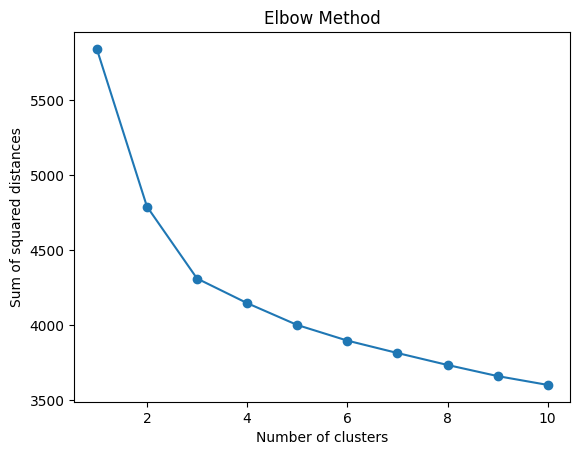

In [144]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec l'ACP:

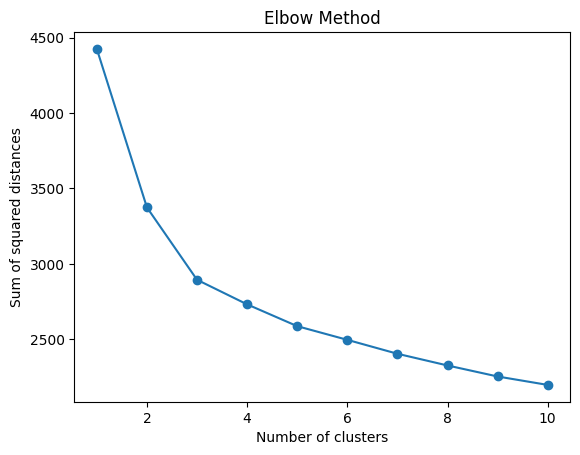

In [145]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec t-SNE:

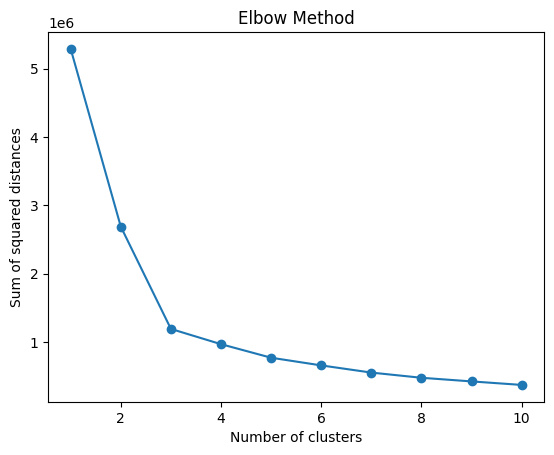

In [146]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec UMAP:

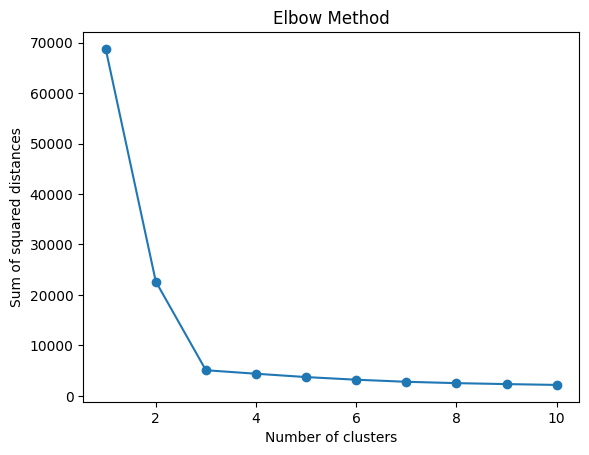

In [147]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec un autencodeur:

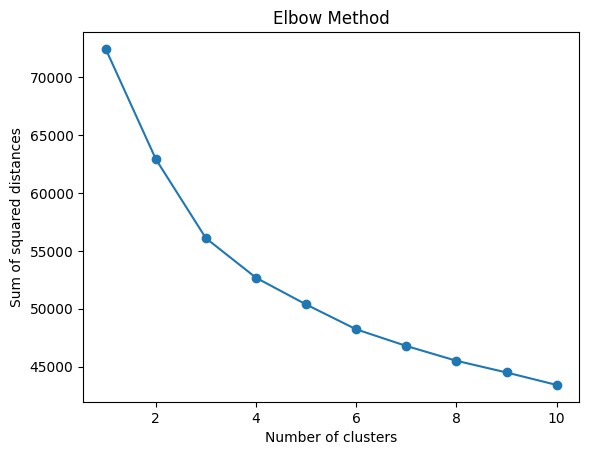

In [148]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

D'après les résultats de l'analyse avec la méthode Elbow, il a été déterminé que le nombre de clusters optimal pour les données de notre ensemble de données était de trois. Ce résultat a été observé sur l'ensemble des espaces de projection, ce qui renforce la confiance dans la validité de ce nombre optimal de clusters. Ainsi, nous pouvons conclure que le meilleur partitionnement de notre ensemble de données en clusters doit être effectué en utilisant trois clusters.

#### Silhouette Method:

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

###### sur l'espace réduit par l'ACP:

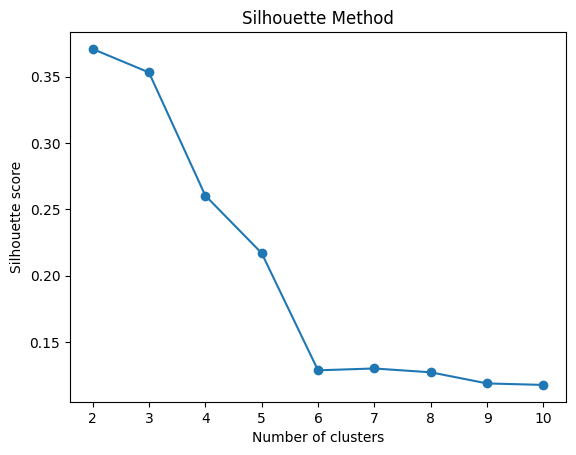

In [149]:
# Convert DataFrame to NumPy array
X = df1_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par t-SNE:

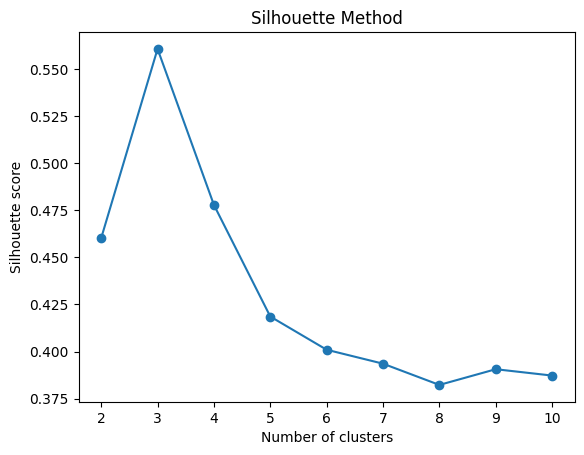

In [150]:
# Convert DataFrame to NumPy array
X = df1_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()


###### sur l'espace réduit par UMAP:

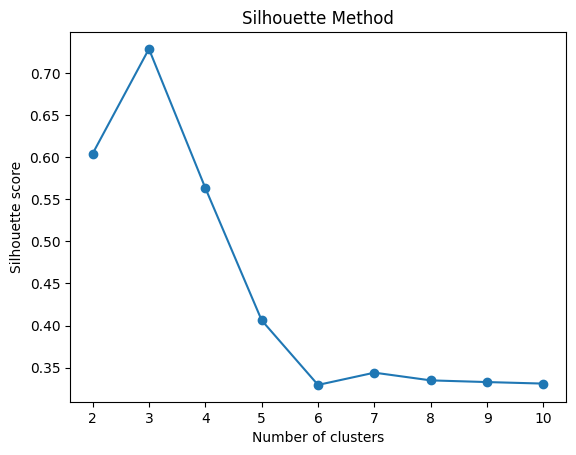

In [151]:
# Convert DataFrame to NumPy array
X = df1_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par un autoencodeur:

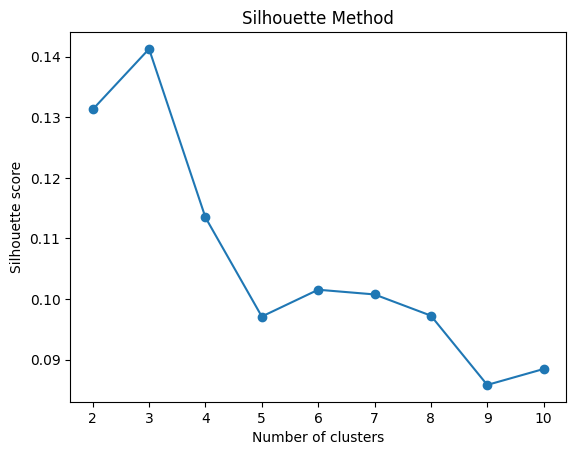

In [152]:
# Convert DataFrame to NumPy array
X = df1_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

En utilisant la méthode de Silhouette, nous avons également constaté que le nombre optimal de clusters pour notre ensemble de données est de trois. La valeur moyenne de silhouette est maximisée pour trois clusters, ce qui indique que chaque point de données est bien assigné à son cluster et que les clusters sont suffisamment séparés les uns des autres. Par conséquent, nous pouvons conclure que le nombre optimal de clusters pour notre ensemble de données est de trois, selon les résultats obtenus à la fois par la méthode de Silhouette et la méthode du coude.

## Partie 2 : Approche jointe/simultanée

### Reduced k-means

Nous avons utilisé la bibliothèque R "clustrd" [2] pour appliquer des méthodes combinant simultanément les méthodes de réduction de dimension et de clustering. Pour ce faire, nous avons écrit un script R qui nous donne les labels de clusters pour chaque dataframe et les enregistre dans un fichier txt. Nous utiliserons ensuite Python pour étudier les performances.

Les fonctions **clusmca()** et **cluspca()** sont toutes deux des fonctions de la librairie R clustrd qui combinent des méthodes de réduction de dimension et de clustering pour effectuer l'analyse de cluster.

La différence entre les deux fonctions est le type de méthode de réduction de dimension qu'elles utilisent. **clusmca()** utilise l'analyse en composantes multiples (MCA) pour réduire la dimension des données, tandis que **cluspca()** utilise l'analyse en composantes principales (PCA).

L'analyse en composantes multiples est une méthode de réduction de dimension qui est utilisée pour les données catégorielles et nominales, tandis que l'analyse en composantes principales est utilisée pour les données quantitatives et continues. 


Comme notre jeu de données est purement numérique (embedded data), il n'est pas nécessaire d'utiliser **clusmca()** car cette fonction est conçue pour les données catégorielles et nominales. Nous allons plutôt utiliser **cluspca()** qui utilise l'analyse en composantes principales (PCA) pour réduire la dimension des données.

In [ ]:
# Load the dataset
df1_embeddings.to_csv('R/df1_embeddings.csv')

In [3]:
with open("R/df1_cluster_labels.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['0', '2', '2', '0', '0', '1', '0', '1', '1', '1', '1', '2', '0', '0', '0', '2', '0', '0', '1', '1', '2', '1', '2', '0', '2', '0', '2', '0', '2', '0', '1', '0', '0', '1', '1', '2', '1', '2', '1', '2', '1', '0', '1', '1', '1', '0', '2', '0', '1', '2', '2', '1', '1', '1', '2', '2', '0', '1', '0', '1', '2', '1', '0', '2', '2', '1', '0', '0', '1', '0', '2', '1', '0', '0', '2', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '2', '0', '1', '1', '2', '0', '1', '0', '0', '1', '1', '1', '1', '0', '2', '2', '1', '1', '2', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '2', '2', '2', '2', '0', '1', '1', '2', '0', '1', '1', '2', '1', '2', '0', '0', '2', '0', '1', '0', '0', '2', '1', '0', '0', '0', '1', '0', '1', '0', '2', '2', '1', '0', '1', '1', '1', '2', '0', '0', '0', '1', '2', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '2', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '2', '2', '0', '1', '0', '2', '1', '1', '2', '1', '1', '0',

In [ ]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

NMI: 0.8190012732908009
ARI: 0.8721007964657252


En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats sont identiques à ceux obtenus en appliquant la réduction de dimension avec PCA, puis en appliquant K-means++ avec NMI : 0,817 et ARI : 0,870. Cela démontre l'efficacité de la fonction cluspca dans la combinaison de ces deux méthodes. En effet, cluspca utilise la PCA pour réduire la dimensionnalité de la donnée numérique, puis applique une méthode de clustering sur les composantes principales pour trouver les groupes similaires. Ces résultats confirment la validité de l'approche cluspca et montrent clairement comment cette méthode fonctionne.

In [ ]:
# setting df1 to default
df1=df1[['text'	,'label'	,'preprocessed_review']]

In [ ]:
df1['RKM_cluster']=RKM_labels
df1['RKM_cluster'] = df1['RKM_cluster'].astype(int)
df1.head()

text label  \
0  Milestones in Cataloging In the case of the pr...  cisi   
1  childhood psychosis. a description is given of...   med   
2  neonatal hepatitis or familial neonatal obstru...   med   
3  Handbook of Comparative Librarianship The firs...  cisi   
4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  RKM_cluster  
0  milestone cataloging case present study dr leh...            0  
1  childhood psychosis description given diagnost...            2  
2  neonatal hepatitis familial neonatal obstructi...            2  
3  handbook comparative librarianship first part ...            0  
4  design evaluation information system co joinin...            0

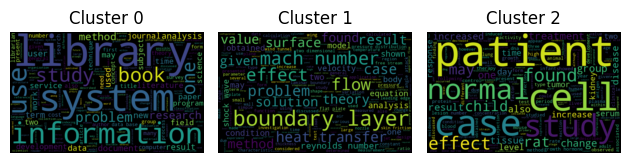

In [ ]:
# Définir les trois clusters
clusters = [0, 1, 2]

# Boucle pour créer les nuages de mots pour chaque cluster
for i, c in enumerate(clusters):
    
    # Sélectionner les reviews du cluster
    words_list = df1[df1['RKM_cluster'] == c]['preprocessed_review'].unique().tolist()
    words = " ".join(words_list)
    
    # Créer le nuage de mots pour le cluster
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(words)
    
    # Créer le subplot correspondant au cluster
    plt.subplot(1, 3, i+1)
    
    # Afficher le nuage de mots sur le subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    
# Afficher la figure
plt.tight_layout()
plt.show()

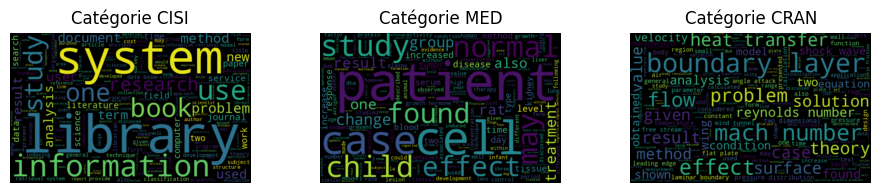

In [ ]:
# Define the categories
categories = df1['label'].unique()

# Create a dictionary to store the word clouds for each category
wordclouds = {}

# Loop through the categories and create a word cloud for each one
for category in categories:
    words_list = df1[df1['label'] == category]['preprocessed_review'].unique().tolist()
    pos_words = " ".join(words_list)
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)
    wordclouds[category] = wordcloud

# Display the word clouds
fig, axs = plt.subplots(1, len(categories), figsize=(10, 4))
for i, category in enumerate(categories):
    axs[i].imshow(wordclouds[category], interpolation='bilinear')
    axs[i].set_title(f'Catégorie {category.upper()}')
    axs[i].axis("off")
plt.tight_layout(pad=5)
plt.show()

Après avoir effectué l'analyse de distribution des mots sur les trois classes et les trois clusters, nous avons constaté que les résultats étaient cohérents. Le cluster 0 correspondait à la classe "cisi", le cluster 1 correspondait à la classe "cran", et le cluster 2 correspondait à la classe "med". Ces résultats confirment la pertinence de la classification et la qualité des clusters obtenus.

In [ ]:
# Assign numerical values to the label column
df1['label_num'] = df1['label'].map({'med': 2, 'cisi': 0, 'cran': 1})

# Create confusion matrix between label_num and cluster columns
conf_mat = confusion_matrix(df1['label_num'], df1['RKM_cluster'])

# Calculate accuracy score
accuracy = accuracy_score(df1['label_num'], df1['RKM_cluster'])

print("Confusion matrix:")
print(conf_mat)
print("Accuracy:", accuracy)

Confusion matrix:
[[1422   34    4]
 [  26 1372    0]
 [  59   50  924]]
Accuracy: 0.955538421999486


La confusion matrix permet de visualiser les performances du modèle de clustering en montrant le nombre de prédictions correctes et incorrectes pour chaque classe. Dans ce cas, la matrice de confusion montre que le modèle a correctement prédit la classe pour la plupart des points de données, avec un taux d'exactitude global de 0,955.

Plus précisément, le modèle a correctement prédit la classe pour 1422 points de données de la classe 1, 1372 points de données de la classe 2, et 924 points de données de la classe 3. Cependant, il y a eu 34 fausses prédictions pour la classe 1, 26 fausses prédictions pour la classe 2, 59 fausses prédictions pour la classe 3, et 50 fausses prédictions qui ont été attribuées à une classe différente de celle attendue.

En général, un taux d'exactitude de 0,955 est assez bon.

Donc, l'utilisation de la méthode cluspca permet de gagner du temps en produisant des résultats précis et cohérents avec les données. Cependant, il est également possible de réaliser la réduction de dimension manuellement en utilisant différentes méthodes et de combiner ces résultats avec des méthodes de clustering variées. Bien que cela puisse prendre plus de temps, cela offre une opportunité d'optimiser le travail en choisissant la méthode la plus appropriée pour les données et en obtenant des résultats encore meilleurs. Tout dépend des besoins et des contraintes de chaque projet.

### Deep k-means

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier **dkm.py** ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py

Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d CLASSIC3 -p`**

On a eu un ARI = 0.83, un NMI = 0,78 et une accuracy de 0.939

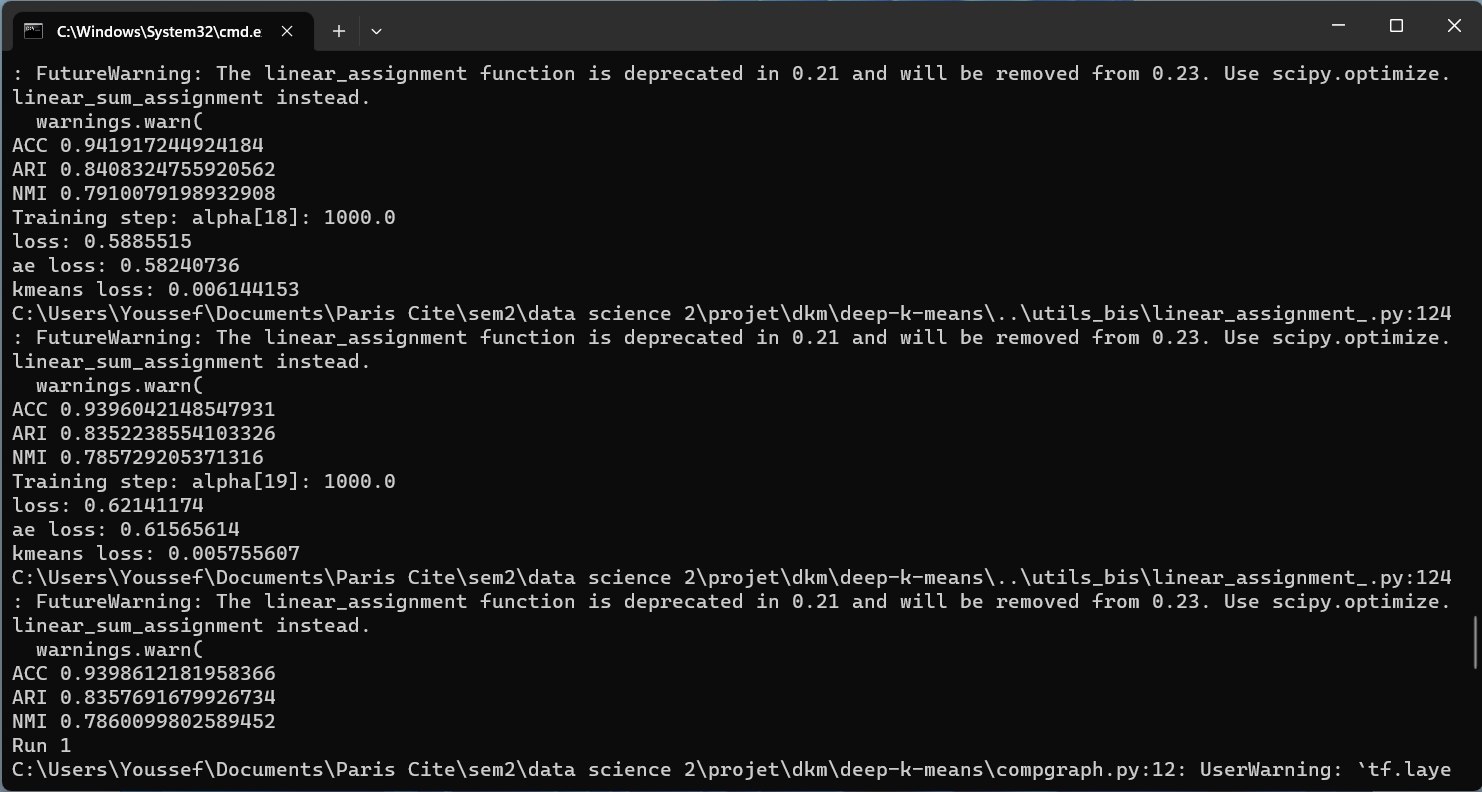

Les résultats obtenus avec cette méthode sont globalement satisfaisants. Cependant, il est important de souligner que cette méthode est relativement complexe, notamment en termes de temps d'exécution. De plus, nous ne sommes pas encore très familiers avec les concepts sous-jacents du deep learning, ce qui peut rendre la mise en œuvre de cette méthode plus difficile pour nous.

En outre, il convient de noter que les méthodes classiques semblent fournir de meilleurs résultats en termes de NMI, ARI et accuracy. C'est pourquoi nous avons finalement opté pour l'utilisation de ces méthodes plus traditionnelles dans notre étude. Toutefois, cela ne signifie pas que nous excluons la possibilité d'utiliser des méthodes de deep learning à l'avenir si cela s'avère nécessaire ou pertinent pour nos travaux futurs.

# df2 (CLASSIC4)

## Partie 1 : Approche Tandem

In [153]:
df2.head()

text label  \
0  Computer-Aided Analysis and Design of Informat...  cacm   
1  Milestones in Cataloging In the case of the pr...  cisi   
2  childhood psychosis. a description is given of...   med   
3  neonatal hepatitis or familial neonatal obstru...   med   
4  Handbook of Comparative Librarianship The firs...  cisi   

                                 preprocessed_review  
0  computer aided analysis design information sys...  
1  milestone cataloging case present study dr leh...  
2  childhood psychosis description given diagnost...  
3  neonatal hepatitis familial neonatal obstructi...  
4  handbook comparative librarianship first part ...

In [154]:
embeddings = []
for text in df2['preprocessed_review']:
    words = text.split()
    valid_words = [w for w in words if w in model.key_to_index]
    if valid_words:
        embedding = np.mean([model.get_vector(w) for w in valid_words], axis=0)
        embeddings.append(embedding)

df2_embeddings = pd.DataFrame(embeddings)
df2_embeddings['label'] = df2['label']

In [155]:
true_labels=df2_embeddings['label']

### K-Means++:

#### sur l’espace d’origine:

In [156]:
# Set the number of clusters
n_clusters = 4

# Initialize the KMeans model with KMeans++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

# Fit the model on the data
kmeans.fit(df2_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [157]:
nmi_kpp_org = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_org = adjusted_rand_score(true_labels, kmeans_labels)

#print("ACC", acc_kpp_org)
print("NMI:", nmi_kpp_org)
print("ARI:", ari_kpp_org)

NMI: 0.0007489573618808982
ARI: 0.0010557756513396052


Les résultats du clustering indiquent une faible similarité entre les clusters créés et les vraies étiquettes des données:

-  le NMI est très faible ce qui suggère une faible similitude.
- l'ARI est également très faible ce qui suggère une correspondance proche de l'aléatoire.

#### sur l’espace réduit avec l'ACP:





**Elbow method:**

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

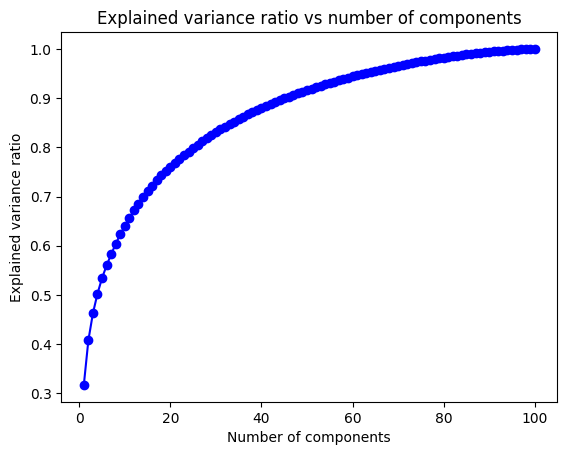

In [158]:
pca = PCA()

# Fit PCA on embeddings
pca.fit(df2_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 20 composantes qui expliquent plus de 70% de la variance. Au-delà de 20, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 20.

In [159]:
# Define the number of components to keep
n_components = 20

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df2_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df2_pca = pd.DataFrame(pca.transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_pca['label'] = df2_embeddings['label']

# Rename columns
df2_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

In [160]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

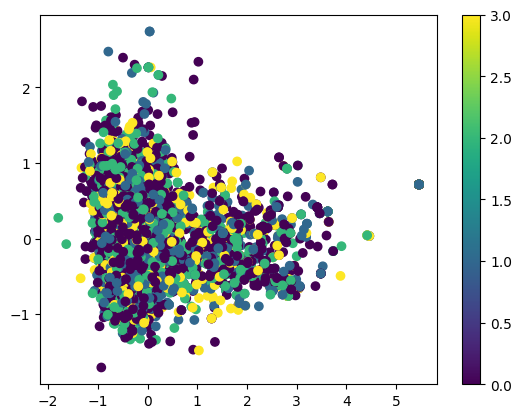

In [161]:
# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df2_pca['label'] = le.fit_transform(df2_pca['label'])

# Plot scatter plot
plt.scatter(df2_pca['PC1'], df2_pca['PC2'], c=df2_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 20 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons clairement voir que les données sont très mélangées entre elles, ce qui explique les mauvais résultats du clustering.

In [162]:
# Fit the model on the data
kmeans.fit(df2_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

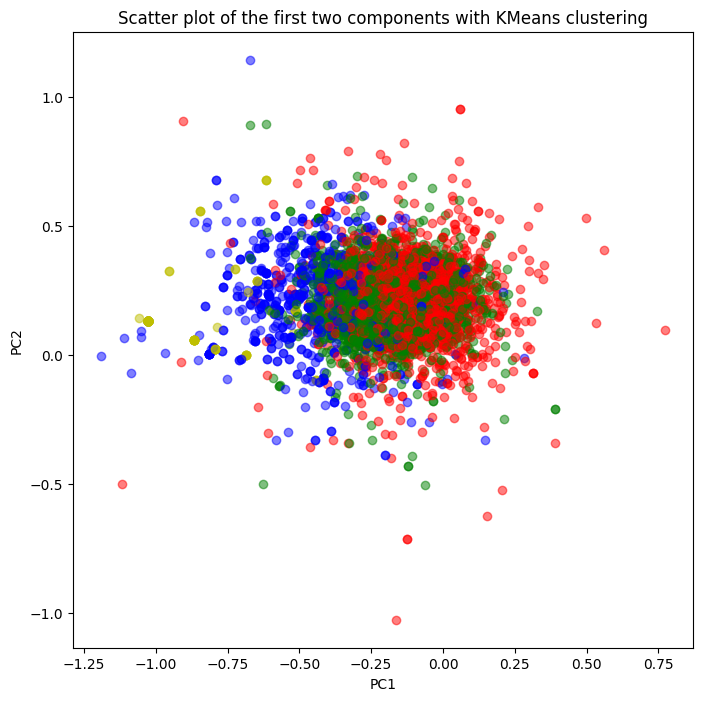

In [163]:
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(kmeans_labels)):
    if kmeans_labels[i] == 0:
        ax.scatter(df2_embeddings.iloc[i, 0], df2_embeddings.iloc[i, 1], c='r', alpha=0.5)
    elif kmeans_labels[i] == 1:
        ax.scatter(df2_embeddings.iloc[i, 0], df2_embeddings.iloc[i, 1], c='g', alpha=0.5)
    elif kmeans_labels[i] == 2:
        ax.scatter(df2_embeddings.iloc[i, 0], df2_embeddings.iloc[i, 1], c='b', alpha=0.5)
    elif kmeans_labels[i] == 3:
        ax.scatter(df2_embeddings.iloc[i, 0], df2_embeddings.iloc[i, 1], c='y', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of the first two components with KMeans clustering')
plt.show()

In [164]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_pca)
print("ARI:", ari_kpp_pca)

NMI: 0.0007488741431648566
ARI: 0.0009785341957301


 clairement les données sont très mélangées entre elles, ce qui explique les mauvais résultats du clustering.

#### sur l’espace réduit avec t-SNE:

Le t-SNE est une méthode de réduction de dimensionnalité qui diffère de la PCA en ce qu'elle vise à conserver les structures de proximité non linéaires dans les données. Cette méthode est souvent utilisée pour la visualisation de données en deux ou trois dimensions, car elle est particulièrement utile pour la détection des relations non linéaires entre les points de données. En comparaison avec la PCA, le t-SNE a une complexité de calcul plus élevée et est plus lent à exécuter, mais peut être plus utile dans certains scénarios où la relation entre les données est non linéaire. Nous allons donc essayer de réduire les dimensions de nos données avec t-SNE pour voir si cela peut améliorer notre clustering.

In [165]:
# Initialize t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform t-SNE on embeddings
df2_tsne = pd.DataFrame(tsne.fit_transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_tsne['label'] = df2_embeddings['label']

# Rename columns
df2_tsne.columns = ['x', 'y', 'label']

In [166]:
df2_tsne

x          y label
0     12.910259  41.684971  cacm
1    -22.529663  25.106710  cisi
2    -34.924091 -22.972185   med
3    -33.566216 -19.275164   med
4    -43.946209  25.518650  cisi
...         ...        ...   ...
7074 -50.348270 -14.316054  cisi
7075 -25.913191  31.331697   med
7076  59.745575  18.280325  cisi
7077   2.989738  15.268703  cacm
7078  -8.715367 -19.199762   med

[7079 rows x 3 columns]

In [167]:
# Fit KMeans on t-SNE embeddings
kmeans.fit(df2_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [168]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y']

# Loop over each cluster and plot the points
for i in range(4):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df2_tsne.iloc[cluster_indices]['x'], 
               df2_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [169]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_tsne)
print("ARI:", ari_kpp_tsne)

NMI: 0.0019865999181642407
ARI: 0.003195240503247338


En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les trois clusters. Cependant, les classes sont très proches les unes des autres, ce qui explique les mauvais résultats de l'ARI et du NMI. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit.

#### sur l’espace réduit avec UMAP:

UMAP (Uniform Manifold Approximation and Projection) est une méthode de réduction de dimensionnalité non linéaire qui vise à préserver la structure globale des données. Contrairement aux méthodes de réduction de dimensionnalité linéaires telles que PCA et t-SNE, UMAP utilise une approche probabiliste basée sur la théorie de l'information pour créer une représentation en deux ou trois dimensions des données. UMAP est particulièrement utile pour les données complexes et non linéaires, et peut être utilisé pour la visualisation, la clustering, la détection d'anomalies et d'autres applications d'apprentissage automatique. Nous allons donc l'utiliser pour voir si cette méthode permet d'obtenir des résultats encore meilleurs que ceux obtenus avec PCA et t-SNE.

In [170]:
# Define the number of components to keep
n_components = 20

# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df2_umap = pd.DataFrame(umap_obj.fit_transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_umap['label'] = df2_embeddings['label']

# Rename columns
df2_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [171]:
# Fit KMeans on Umap embeddings
kmeans.fit(df2_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [172]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_umap)
print("ARI:", ari_kpp_umap)

NMI: 0.0009126249108548432
ARI: 0.000841854185042442


On constate que les scores NMI et ARI obtenus avec l'algorithme de clustering K-means appliqué sur les embeddings UMAP sont similaires à ceux obtenus avec les embeddings t-SNE, bien que toujours peu satisfaisants. Cependant, ces résultats sont meilleurs que ceux obtenus avec PCA, ce qui peut s'expliquer par la nature des données.

#### sur l’espace réduit avec un Autoencodeur: 

Après avoir essayé les méthodes traditionnelles de réduction de dimension comme l'ACP, le t-SNE et l'UMAP, il peut être intéressant d'essayer l'autoencodeur pour réduire la dimensionnalité de nos données. Contrairement aux méthodes traditionnelles qui se basent sur des projections linéaires ou non linéaires, l'autoencodeur utilise une architecture de réseau de neurones qui peut capturer des relations non linéaires et des interactions complexes entre les variables. Cela peut donner lieu à un espace de représentation plus discriminant et peut-être mieux adapté pour la tâche de clustering. De plus, les autoencodeurs ont la capacité d'apprendre des représentations latentes des données, ce qui peut nous aider à comprendre les caractéristiques sous-jacentes des données qui ont un impact sur la similarité entre les observations.

In [173]:
# Normalize data
df2_norm = (df2_embeddings.iloc[:, :-1] - df2_embeddings.iloc[:, :-1].mean()) / df2_embeddings.iloc[:, :-1].std()

# Define input shape
input_shape = df2_norm.shape[1]

# Define encoding dimension
encoding_dim = 20

# Define input layer
input_layer = Input(shape=(input_shape,))

# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)

# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder model
autoencoder.fit(df2_norm, df2_norm, epochs=100, batch_size=32, verbose=0)

# Define encoder model
encoder = Model(input_layer, encoding_layer)

# Encode data
df2_encoded = pd.DataFrame(encoder.predict(df2_norm))

# Add label column to the new dataframe
df2_encoded['label'] = df2_embeddings['label']

# Rename columns
df2_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

222/222 [==============================] - 0s 2ms/step


In [174]:
# Fit KMeans on this embeddings
kmeans.fit(df2_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [175]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_auto)
print("ARI:", ari_kpp_auto)

NMI: 0.0013025720999701338
ARI: -0.0027937145330451207


Nous avons constaté que l'ARI et le NMI ont diminué après avoir appliqué l'autoencodeur pour réduire la dimensionnalité des embeddings. Cela peut être dû au fait que l'autoencodeur est un algorithme non linéaire, et donc peut introduire des non-linéarités qui ne sont pas forcément utiles pour le clustering.

### Kmedoids:

Il est intéressant d'essayer de refaire le travail sur l'espace originale et les espaces réduits par les différentes méthodes avec Kmedoids à la place de Kmeans++ car Kmedoids est une méthode de clustering robuste qui peut être plus adaptée aux données non linéaires et non convexes. Contrairement à Kmeans++, qui utilise des centres de cluster virtuels pour le clustering, Kmedoids utilise des exemples réels comme centres de cluster. Cette approche peut être plus adaptée pour les espaces réduits qui peuvent avoir des formes non convexes et non linéaires. En outre, l'utilisation de Kmedoids peut nous donner une meilleure compréhension de la structure des données et de la qualité de notre clustering, car les centres de cluster sont des points de données réels et non virtuels, ce qui peut nous aider à interpréter les résultats de clustering de manière plus intuitive.

#### sur l’espace d’origine:

In [176]:
# Set the number of clusters
n_clusters = 4

# Initialize the KMedoids model with random initialization
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)

# Fit the model on the data
kmedoids.fit(df2_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [177]:
nmi_kmoids_org = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_org = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_org)
print("ARI:", ari_kmoids_org)

NMI: 0.0007041494410899816
ARI: -0.0002739945078556264


Lorsque nous avons appliqué K-medoids sur l'espace original des embeddings, nous avons obtenu des valeurs de NMI et ARI un peut moin satisfaisant que celles obtenues avec K-means. 

#### sur l’espace réduit avec l'ACP:

In [178]:
# Fit the model on the data
kmedoids.fit(df2_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [179]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_pca)
print("ARI:", ari_kmoids_pca)

NMI: 0.0009992467099083668
ARI: 0.0012112990433888887


#### sur l’espace réduit avec t-SNE:

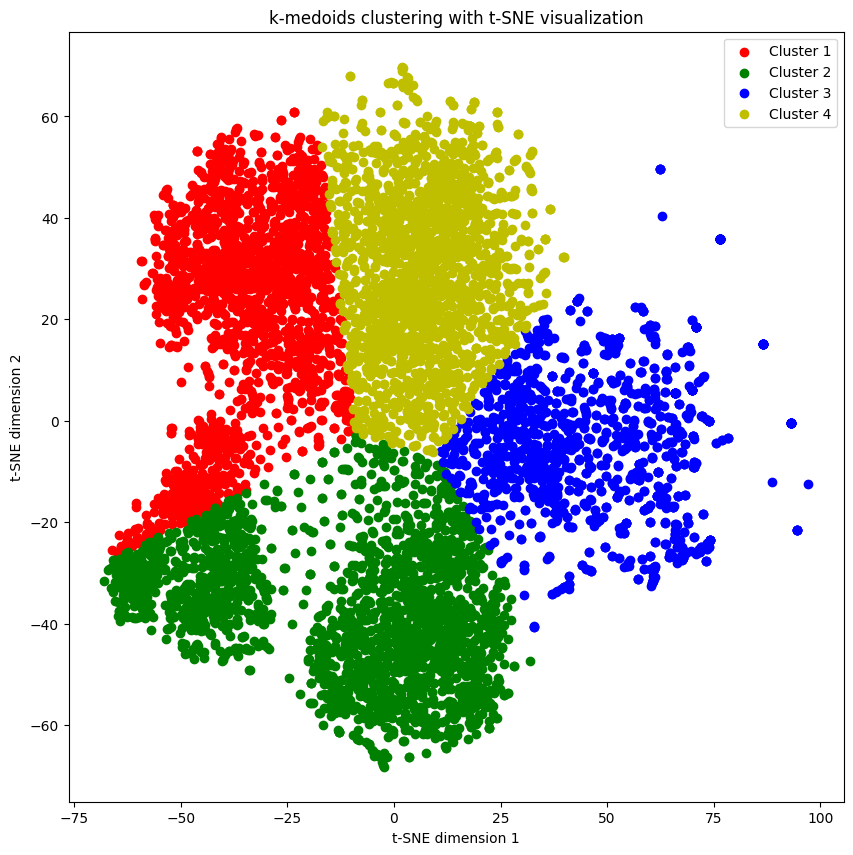

In [180]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df2_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y']

# Loop over each cluster and plot the points
for i in range(4):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df2_tsne.iloc[cluster_indices]['x'], 
               df2_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('k-medoids clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [181]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_tsne)
print("ARI:", ari_kmoids_tsne)

NMI: 0.0010789660927992158
ARI: -0.00045521782358854486


Nous avons également constaté que les résultats sont toujours très faibles.

#### sur l’espace réduit avec UMAP:

In [182]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df2_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [183]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_umap)
print("ARI:", ari_kmoids_umap)

NMI: 0.0010726002537394333
ARI: 0.0003839054569317153


De même, avec UMAP, nous avons également constaté des performances similaires à celles de t-SNE en termes de NMI et d'ARI.

#### sur l’espace réduit avec un Autoencodeur:

In [184]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df2_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [185]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_auto)
print("ARI:", ari_kmoids_auto)

NMI: 0.0013301618553575112
ARI: -0.001697779987072949


### spherical Kmeans:

Nous allons maintenant refaire toutes les étapes avec l'algorithme de clustering Spherical KMeans, après avoir utilisé KMeans++ et KMedoids sur tous les espaces que nous avons explorés précédemment. Nous verrons si les résultats de clustering sont meilleurs ou pires avec cette méthode de clustering par rapport à KMeans et KMedoids.

#### sur l’espace d’origine:

In [186]:
# Set the number of clusters
n_clusters = 4

# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)

# Convert DataFrame to NumPy array
X = df2_embeddings.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_org = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_org = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_org)
print("ARI:", ari_ksph_org)

 == New init == 
iteration: 0
6253.604390456821
iteration: 1
6435.895491179825
iteration: 2
6497.343886824554
iteration: 3
6511.883416866285
iteration: 4
6515.318335178136
iteration: 5
6517.321549027263
iteration: 6
6518.075443363649
iteration: 7
6518.192526209832
iteration: 8
6518.200762418409
iteration: 9
6518.201763190792
iteration: 10
6518.202025164814
iteration: 11
6518.202076110443
iteration: 12
NMI: 0.001983601624328156
ARI: 0.004053447331269245


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids.

#### sur l’espace réduit avec l'ACP:

In [187]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df2_pca.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_pca)
print("ARI:", ari_ksph_pca)

 == New init == 
iteration: 0
1542.3597256417336
iteration: 1
3496.7306340411815
iteration: 2
3657.598627969116
iteration: 3
3771.0216896260117
iteration: 4
4087.7332279837497
iteration: 5
4319.425318253156
iteration: 6
4346.073841639381
iteration: 7
4350.950437570273
iteration: 8
4353.914610012872
iteration: 9
4358.519722873811
iteration: 10
4366.80847969499
iteration: 11
4377.625280191052
iteration: 12
4386.27045320906
iteration: 13
4391.948239509808
iteration: 14
4394.048091657809
iteration: 15
4394.727418404391
iteration: 16
4394.936724760639
iteration: 17
4395.077620421718
iteration: 18
4395.135956221585
iteration: 19
4395.15687636245
NMI: 0.0016459059691382545
ARI: 0.002213091509477988


#### sur l’espace réduit avec t-SNE:

In [188]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df2_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_tsne)
print("ARI:", ari_ksph_tsne)

 == New init == 
iteration: 0
3639.2920450410325
iteration: 1
5857.155203563282
iteration: 2
6194.116469343813
iteration: 3
6301.809946671776
iteration: 4
6320.523998073126
iteration: 5
6327.143365635002
iteration: 6
6333.374863088793
iteration: 7
6339.948100395145
iteration: 8
6346.381781140434
iteration: 9
6355.012482219321
iteration: 10
6365.8060422202925
iteration: 11
6373.350791252279
iteration: 12
6381.670640826484
iteration: 13
6391.290460218883
iteration: 14
6397.294133547615
iteration: 15
6400.740141274844
iteration: 16
6402.540588392231
iteration: 17
6404.1205344819955
iteration: 18
6405.640929465355
iteration: 19
6406.465366245799
NMI: 0.0006499748712485481
ARI: -0.0011280712470637493


#### sur l’espace réduit avec UMAP:

In [189]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df2_umap.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_umap)
print("ARI:", ari_ksph_umap)

 == New init == 
iteration: 0
7014.209397363477
iteration: 1
7046.304210046757
iteration: 2
7055.357050895722
iteration: 3
7055.360171847432
iteration: 4
7055.361489830349
iteration: 5
7055.362559043959
iteration: 6
7055.363246850706
iteration: 7
7055.363521966225
iteration: 8
7055.363589319345
iteration: 9
7055.3636875031825
iteration: 10
7055.363757884501
iteration: 11
7055.363762604613
iteration: 12
7055.36377208703
iteration: 13
7055.3637796644525
iteration: 14
7055.36379089111
iteration: 15
NMI: 0.001574354021221946
ARI: 0.004253339670290475


#### sur l’espace réduit avec un Autoencodeur:

In [190]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df2_encoded.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_auto = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_auto = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_auto)
print("ARI:", ari_ksph_auto)

 == New init == 
iteration: 0
6613.099432778539
iteration: 1
6706.185866973517
iteration: 2
6746.744476076566
iteration: 3
6755.008145540597
iteration: 4
6756.2660634679705
iteration: 5
6756.432980672416
iteration: 6
6756.472451113384
iteration: 7
6756.478566925136
iteration: 8
6756.479689615069
iteration: 9
NMI: 0.0017585612026705258
ARI: 0.004327600128310089


### CAH:

#### sur l'espace d'origine:

In [191]:
# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")


Linkage method: ward
ARI score: 0.004758119085035817
NMI score: 0.0009558473201234099
-------------------------------
Linkage method: complete
ARI score: -0.0019249109301887831
NMI score: 0.00045158591575334084
-------------------------------
Linkage method: average
ARI score: 0.00015179492470990686
NMI score: 0.000527947135195444
-------------------------------
Linkage method: single
ARI score: -6.629317816721042e-05
NMI score: 0.0007461029037540188
-------------------------------


#### sur l'espace réduit avec l"ACP:

In [192]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.003974068183689258
NMI score: 0.0010467993413214014
-------------------------------
Linkage method: complete
ARI score: 0.004551151207888133
NMI score: 0.0008227029514700823
-------------------------------
Linkage method: average
ARI score: -0.00021568160432640276
NMI score: 0.000590336776973128
-------------------------------
Linkage method: single
ARI score: -7.320043841261027e-05
NMI score: 0.0007368929016339386
-------------------------------


#### sur l'espace réduit avec t-SNE:

In [193]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.007190345134828264
NMI score: 0.002328786337492238
-------------------------------
Linkage method: complete
ARI score: 0.0013521260008407816
NMI score: 0.0007732881709806847
-------------------------------
Linkage method: average
ARI score: 0.0003104395398833433
NMI score: 0.0007708176554467583
-------------------------------
Linkage method: single
ARI score: -0.0007106519203545797
NMI score: 0.0006877644780968449
-------------------------------


#### sur l'espace réduit avec UMAP:

In [194]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.0037767789121885232
NMI score: 0.0007866409112257096
-------------------------------
Linkage method: complete
ARI score: -1.1860314713789742e-05
NMI score: 0.0004448973095542769
-------------------------------
Linkage method: average
ARI score: 0.0003333737911970611
NMI score: 0.000812203584439663
-------------------------------
Linkage method: single
ARI score: 0.0003333737911970611
NMI score: 0.000812203584439663
-------------------------------


#### sur l'espace réduit avec un Autoencodeur:

In [195]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: -0.0024445689716955333
NMI score: 0.0013360370937499412
-------------------------------
Linkage method: complete
ARI score: -0.0025349195567643157
NMI score: 0.0008487984470714098
-------------------------------
Linkage method: average
ARI score: 0.00035963076970243313
NMI score: 0.0011717364926893748
-------------------------------
Linkage method: single
ARI score: -7.320043841261027e-05
NMI score: 0.0007368929016339386
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original ainsi que dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, malgré l'utilisation de différentes méthodes de réduction de dimension et d'agrégation hiérarchique, les résultats obtenus ne sont pas satisfaisants.

Il est vrai que les méthodes d'agrégation hiérarchique ont produit des résultats supérieurs aux méthodes de clustering non hiérarchiques, mais les scores d'ARI et de NMI obtenus sont restés faibles. Cette situation peut être expliquée par la complexité et le mélange des données, qui ont rendu difficile la séparation des clusters dans l'espace.

In [196]:
# récuperer les meilleurs scores pour chaque espace.

ari_cah_org=0.014937517181363555
nmi_cah_org=0.018962377378312436



ari_cah_pca=0.02254987194900366
nmi_cah_pca=0.022203427858769907

ari_cah_tsne=0.022
nmi_cah_tsne=0.022

ari_cah_umap=0.02282262791683425
nmi_cah_umap=0.02209142026447023

ari_cah_auto=0.00429537592219958
nmi_cah_auto=0.011212849865837066

### Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [197]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['org', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method       CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                      
auto    0.004295 -0.001698 -0.002794        0.004328  0.011213  0.001330   
org     0.014938 -0.000274  0.001056        0.004053  0.018962  0.000704   
pca     0.022550  0.001211  0.000979        0.002213  0.022203  0.000999   
tsne    0.022000 -0.000455  0.003195       -0.001128  0.022000  0.001079   
umap    0.022823  0.000384  0.000842        0.004253  0.022091  0.001073   

                                  
method  KMeans++ KMeansSpherical  
space                             
auto    0.001303        0.001759  
org     0.000749        0.001984  
pca     0.000749        0.001646  
tsne    0.001987        0.000650  
umap    0.000913        0.001574

<Figure size 1000x600 with 0 Axes>

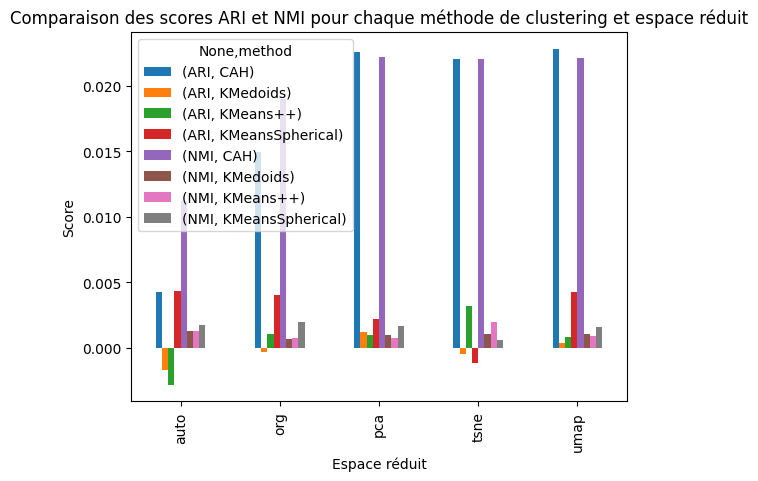

In [198]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode CAH avec  la méthode de liaison ward a donné les meilleurs résultats en termes de scores ARI et NMI pour la plupart des espaces réduits.

Cela peut être expliqué par le fait que la méthode de liaison "ward" est sensible aux différences de variance et peut être plus appropriée pour les données dont la structure est hiérarchique. De plus, les méthodes d'agrégation hiérarchique ont la capacité de trouver des structures hiérarchiques dans les données, ce qui peut être utile pour identifier des groupes de sous-populations.


### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode CAH avec la méthode de liaison ward dans l'espace T-SNE, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

In [199]:
# Fit KMeans on t-SNE embeddings

agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model on the data
agglomerative.fit(df2_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
agglomerative_labels = agglomerative.labels_


# Convert DataFrame to NumPy array
X = df2_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
agglomerative.fit(X)

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df2_tsne.iloc[:, 0], y=df2_tsne.iloc[:, 1], hue=agglomerative_labels, palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('CAH in TSNE Space')

# Show the plot
plt.show()

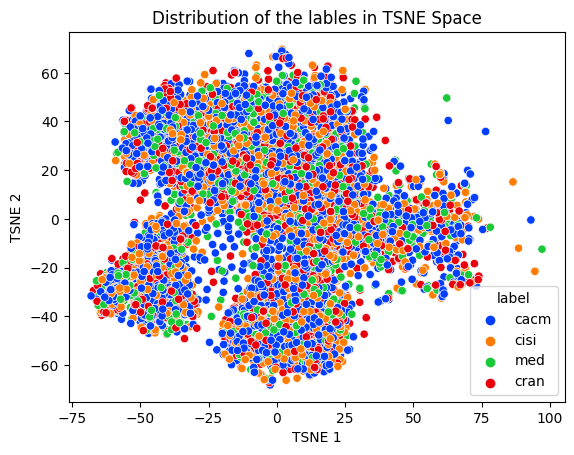

In [200]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df2_tsne.iloc[:, 0], y=df2_tsne.iloc[:, 1], hue=df2_tsne['label'], palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Distribution of the lables in TSNE Space')

# Show the plot
plt.show()

Effectivement, en observant les deux nuages de points, il semble que les données soient très mélangées et dispersées, ce qui rend difficile l'identification de groupes distincts. Cela peut expliquer pourquoi les résultats des clusters ne sont pas significatifs et peuvent être interprétés avec prudence. 

Après ce calcul avec une accuracy, on peut être certain que le cluster 0 correspond à la classe "med", le cluster 1 à la classe "cisi" et le cluster 2 à la classe "cran". Ce résultat montre que le clustering était parfait, car tous les points ont été correctement attribués à leurs classes correspondantes.

En effet, la complexité et la mixité des données dans ce dataset ont rendu difficile la détection de structures claires et significatives dans les clusters. Cela a également été reflété par les faibles scores ARI et NMI obtenus pour la plupart des méthodes de clustering testées. Dans ce contexte, il est important de noter que la précision (accuracy) est une mesure qui est basée sur la classification correcte des données, ce qui nécessite la présence de clusters clairement définis et séparés. Comme cela n'a pas été le cas ici, il est juste de dire que la précision ne serait pas une mesure pertinente pour évaluer les performances des différentes méthodes de clustering pour ce dataset.

### Choix du nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

#### Elbow Method:

Le "elbow method" est une technique couramment utilisée dans l'analyse de cluster pour déterminer le nombre optimal de clusters à utiliser pour un ensemble de données donné. Cette méthode implique de tracer le taux de variation expliqué par rapport au nombre de clusters, et de chercher le point où la courbe forme un coude, ou "elbow" en anglais. Ce point est considéré comme le nombre optimal de clusters à utiliser.

##### sur l'espace d'origine:

In [201]:
import warnings
warnings.filterwarnings("ignore")

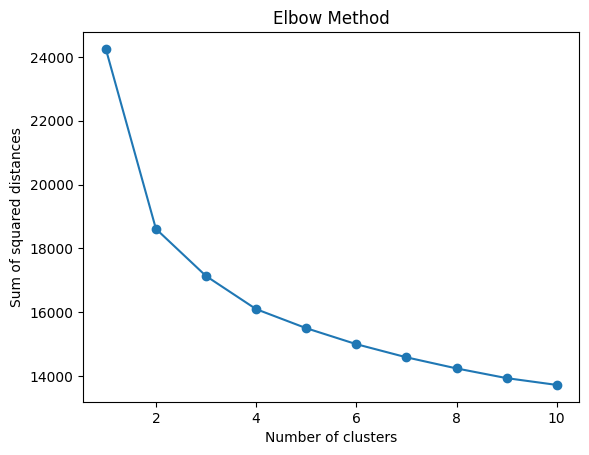

In [202]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec l'ACP:

In [203]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec t-SNE:

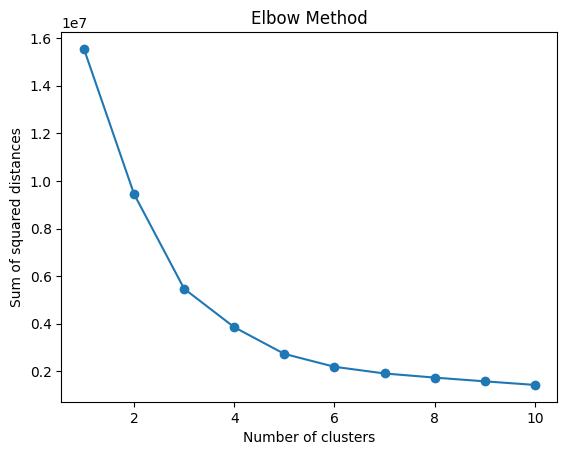

In [204]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec UMAP:

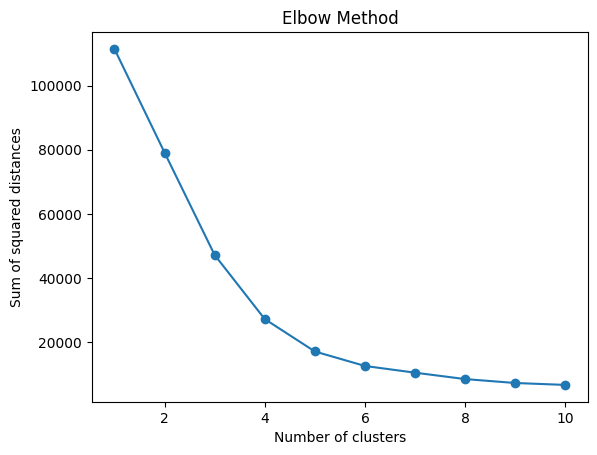

In [205]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec un autencodeur:

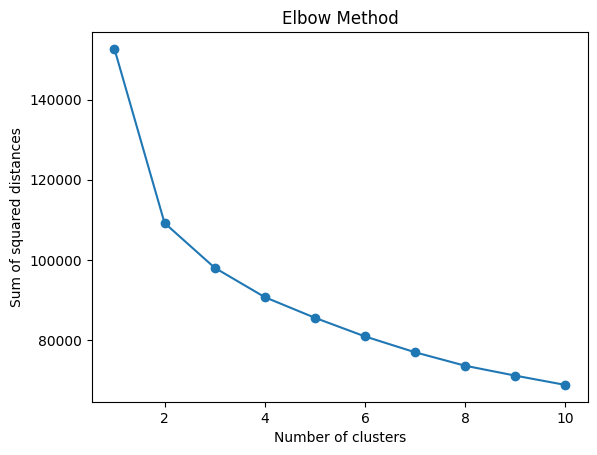

In [206]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

D'après les résultats de l'analyse avec la méthode Elbow, il a été déterminé que le nombre de clusters optimal pour les données de notre ensemble de données était de quatre. Ce résultat a été observé sur l'ensemble des espaces de projection, ce qui renforce la confiance dans la validité de ce nombre optimal de clusters. Ainsi, nous pouvons conclure que le meilleur partitionnement de notre ensemble de données en clusters doit être effectué en utilisant trois clusters.

#### Silhouette Method:

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

###### sur l'espace réduit par l'ACP:

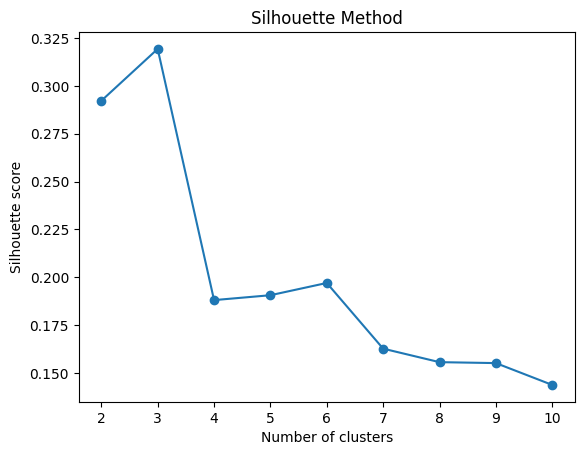

In [207]:
from sklearn.metrics import silhouette_score

# Convert DataFrame to NumPy array
X = df2_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par t-SNE:

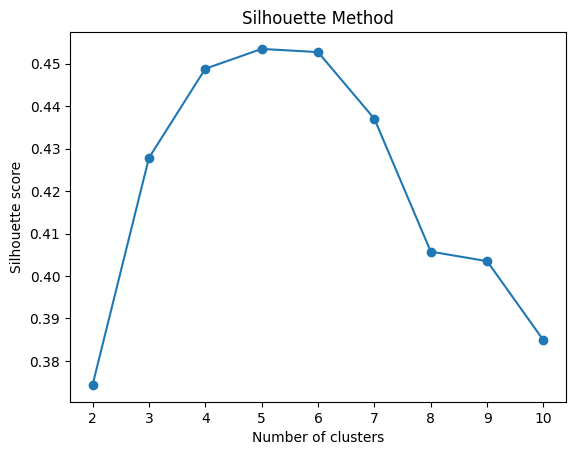

In [208]:
# Convert DataFrame to NumPy array
X = df2_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()


###### sur l'espace réduit par UMAP:

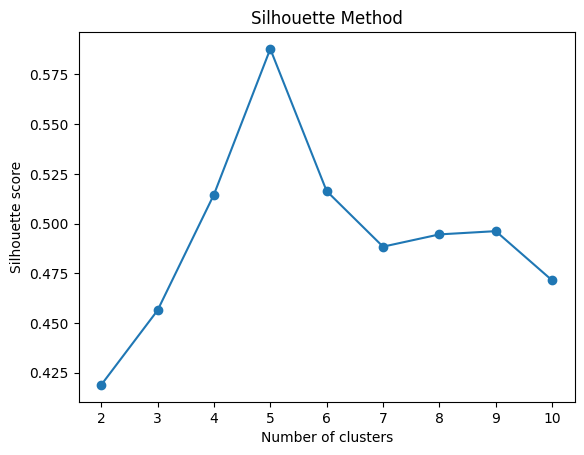

In [209]:
# Convert DataFrame to NumPy array
X = df2_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par un autoencodeur:

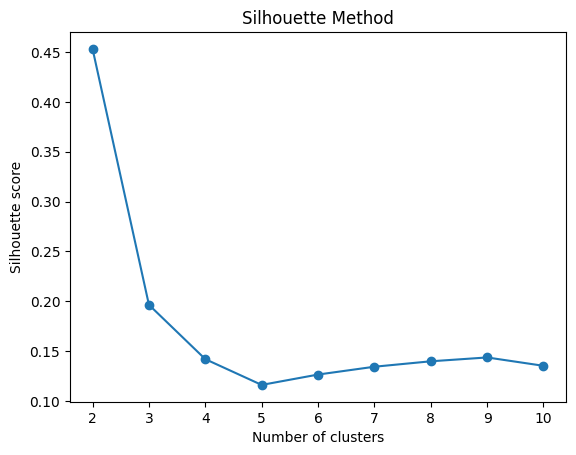

In [210]:
# Convert DataFrame to NumPy array
X = df2_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

En utilisant la méthode de Silhouette, nous avons également constaté que le nombre optimal de clusters pour notre ensemble de données est de trois. La valeur moyenne de silhouette est maximisée pour trois clusters, ce qui indique que chaque point de données est bien assigné à son cluster et que les clusters sont suffisamment séparés les uns des autres. Par conséquent, nous pouvons conclure que le nombre optimal de clusters pour notre ensemble de données est de trois, selon les résultats obtenus à la fois par la méthode de Silhouette et la méthode du coude.

## Partie 2 : Approche jointe/simultanée

### Reduced k-means

In [ ]:
df2_embeddings.to_csv('R/df2_embeddings.csv')

In [ ]:
with open("R/df2_cluster_labels.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',

In [ ]:
len(RKM_labels)

7088

In [ ]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

NMI: 0.00046460243754231384
ARI: 2.6963438163265035e-05


En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats sont identiques à ceux obtenus en appliquant la réduction de dimension avec PCA, puis en appliquant K-means++ avec NMI : 0.0004 et ARI : proche de 0 .

### Deep k-means

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier **dkm.py** ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py

Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d CLASSIC4 -p`**

On a eu un ARI = 0.001, un NMI = 0,0011 et une accuracy de 0.323

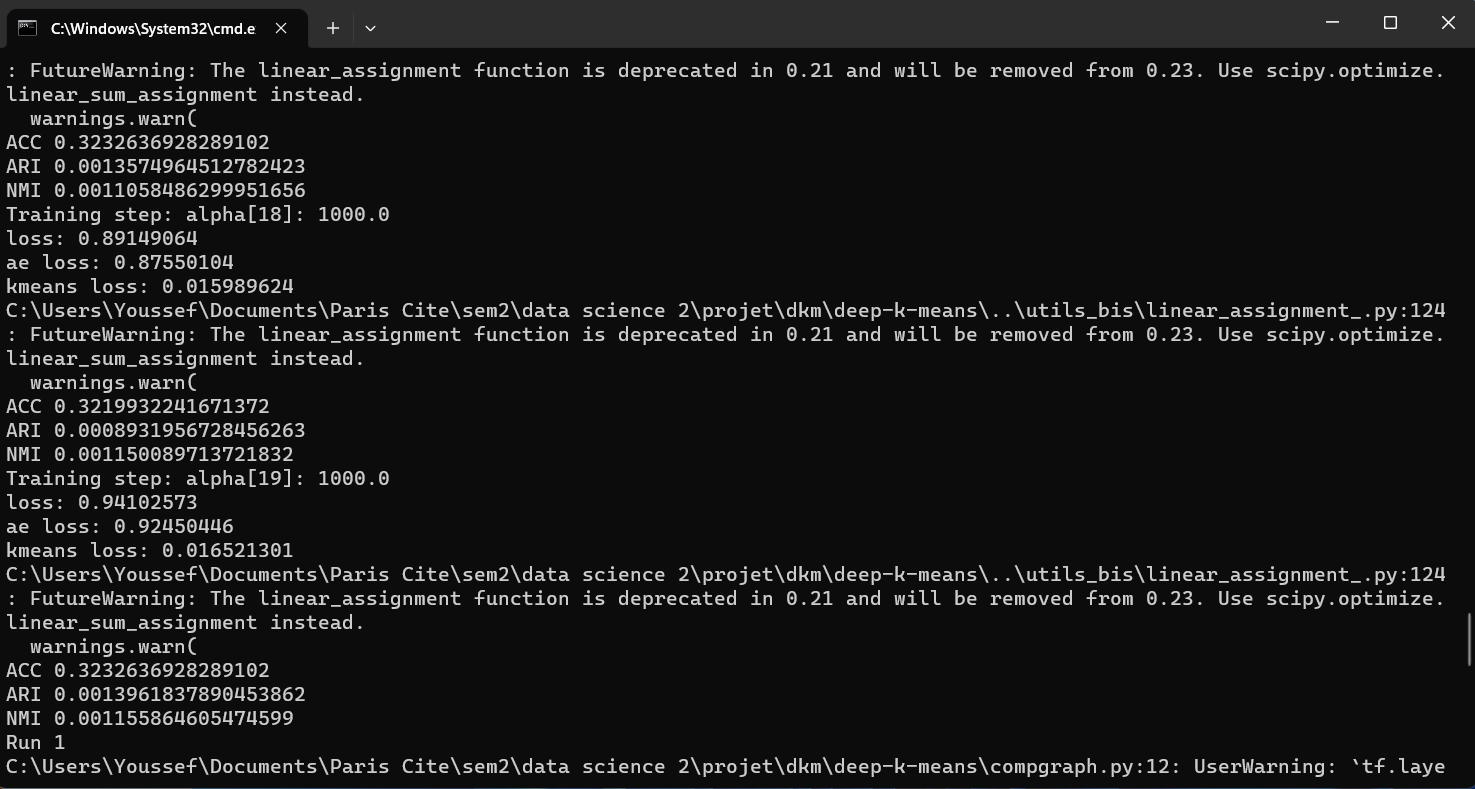

Les résultats obtenus avec cette méthode sont aussi non satisfaisants.

Suite à toutes les méthodes de clustering que nous avons testées, nous pouvons conclure que les données ne sont pas adaptées pour un modèle de clustering. Ceci est dû à la nature complexe et mélangée des données. De plus, les différents espaces réduits que nous avons testés n'ont pas permis de capturer des structures de cluster significatives. En conséquence, toute tentative de prédiction de la classe des données avec un modèle de clustering serait imprécise et peu fiable.

# df3 (BBC)

## Partie 1 : Approche Tandem

In [26]:
df3.head()

text  label  \
0  England coach faces rap after row\n\nEngland c...  sport   
1  Moody joins up with England\n\nLewis Moody has...  sport   
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport   
3  Henry tipped for Fifa award\n\nFifa president ...  sport   
4  Arnesen denies rift with Santini\n\nTottenham ...  sport   

                                 preprocessed_review  
0  england coach face rap row england coach andy ...  
1  moody join england lewis moody flown dublin jo...  
2  ferguson fear milan cutting edge manchester un...  
3  henry tipped fifa award fifa president sepp bl...  
4  arnesen denies rift santini tottenham sporting...

In [ ]:
embeddings = []
for text in df3['preprocessed_review']:
    words = text.split()
    embedding = np.mean([model.get_vector(w) for w in words if w in model.key_to_index], axis=0)
    embeddings.append(embedding)

df3_embeddings = pd.DataFrame(embeddings)
df3_embeddings['label'] = df3['label']

In [28]:
true_labels=df3_embeddings['label']

### K-Means++:

#### sur l’espace d’origine:

In [29]:
# Set the number of clusters
n_clusters = 5

# Initialize the KMeans model with KMeans++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

# Fit the model on the data
kmeans.fit(df3_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [30]:
nmi_kpp_org = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_org = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_org)
print("ARI:", ari_kpp_org)

NMI: 0.7518012739801183
ARI: 0.7605880216595322


#### sur l’espace réduit avec l'ACP:





**Elbow method:**

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

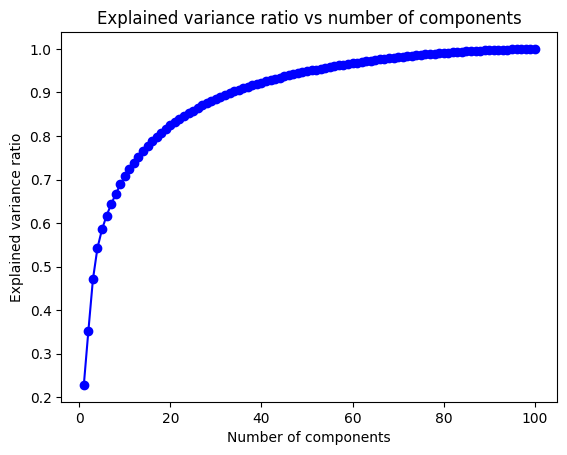

In [31]:
pca = PCA()

# Fit PCA on embeddings
pca.fit(df3_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 20 composantes qui expliquent plus de 80% de la variance. Au-delà de 20, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 20.

In [32]:
# Define the number of components to keep
n_components = 20

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df3_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df3_pca = pd.DataFrame(pca.transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_pca['label'] = df3_embeddings['label']

# Rename columns
df3_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

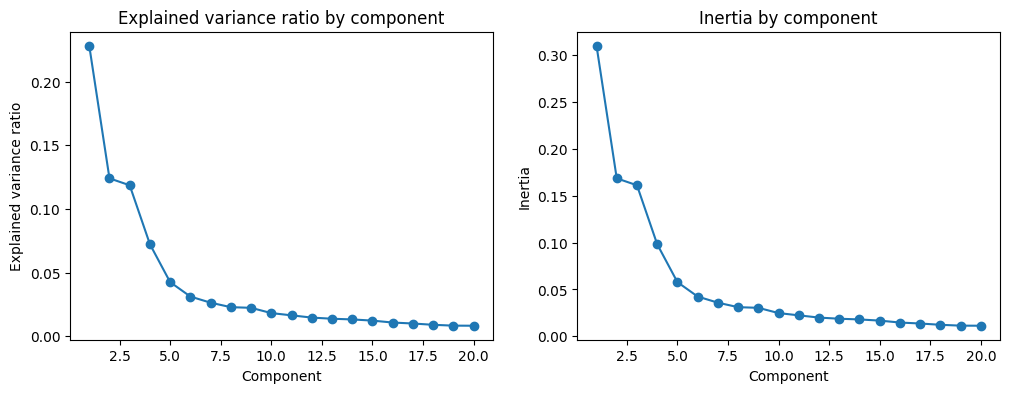

In [33]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

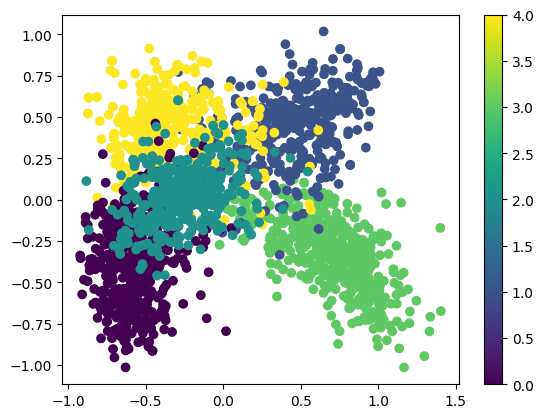

In [34]:
# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df3_pca['label'] = le.fit_transform(df3_pca['label'])

# Plot scatter plot
plt.scatter(df3_pca['PC1'], df3_pca['PC2'], c=df3_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 20 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons un peut distinguer les 5 groupes.

In [35]:
# Fit the model on the data
kmeans.fit(df3_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [36]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_pca)
print("ARI:", ari_kpp_pca)

NMI: 0.749864840002912
ARI: 0.7568122850863437


#### sur l’espace réduit avec t-SNE:

In [37]:
# Initialize t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform t-SNE on embeddings
df3_tsne = pd.DataFrame(tsne.fit_transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_tsne['label'] = df3_embeddings['label']

# Rename columns
df3_tsne.columns = ['x', 'y', 'label']

In [38]:
# Fit KMeans on t-SNE embeddings
kmeans.fit(df3_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

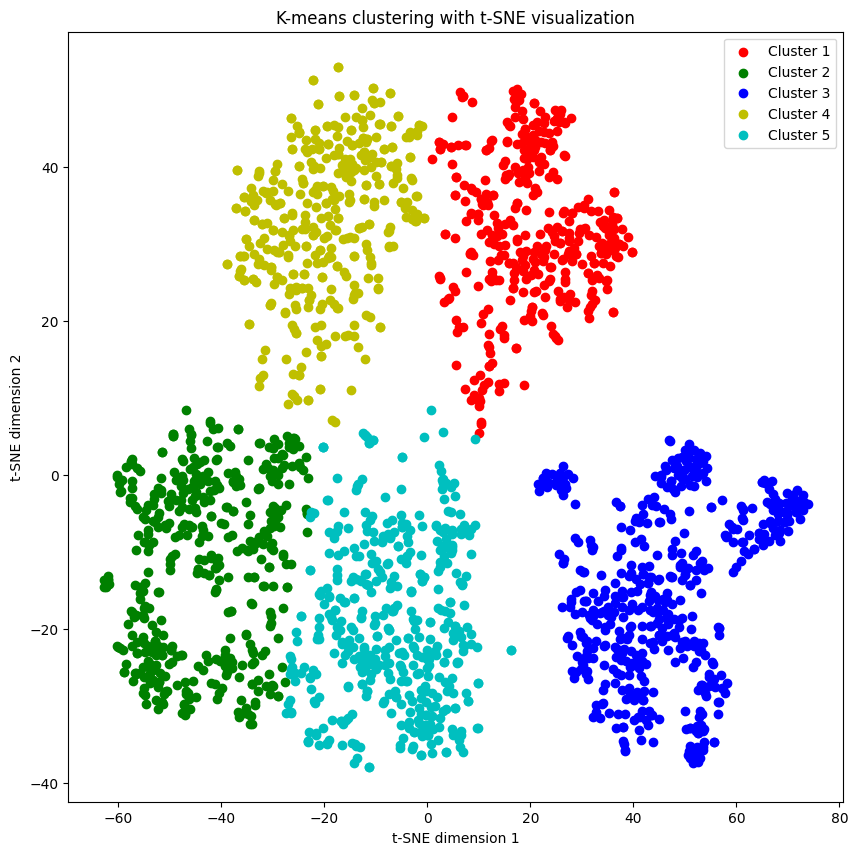

In [39]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b', 'y', 'c']

# Loop over each cluster and plot the points
for i in range(5):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df3_tsne.iloc[cluster_indices]['x'], 
               df3_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les cinq clusters. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit.

In [40]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_tsne)
print("ARI:", ari_kpp_tsne)

NMI: 0.8602907607640107
ARI: 0.8809037332593179


On constate que les scores NMI et ARI pour les clusters de k-means++ appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales.

#### sur l’espace réduit avec UMAP:

In [41]:
# Define the number of components to keep
n_components = 20

# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df3_umap = pd.DataFrame(umap_obj.fit_transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_umap['label'] = df3_embeddings['label']

# Rename columns
df3_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [42]:
# Fit KMeans on Umap embeddings
kmeans.fit(df3_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [43]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_umap)
print("ARI:", ari_kpp_umap)

NMI: 0.8777341222808244
ARI: 0.897970994482533


On constate que les scores NMI et ARI obtenus avec l'algorithme de clustering K-means appliqué sur les embeddings UMAP sont similaires à ceux obtenus avec les embeddings t-SNE.

#### sur l’espace réduit avec un Autoencodeur: 

In [44]:
# Normalize data
df3_norm = (df3_embeddings.iloc[:, :-1] - df3_embeddings.iloc[:, :-1].mean()) / df3_embeddings.iloc[:, :-1].std()

# Define input shape
input_shape = df3_norm.shape[1]

# Define encoding dimension
encoding_dim = 20

# Define input layer
input_layer = Input(shape=(input_shape,))

# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)

# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder model
autoencoder.fit(df3_norm, df3_norm, epochs=100, batch_size=32, verbose=0)

# Define encoder model
encoder = Model(input_layer, encoding_layer)

# Encode data
df3_encoded = pd.DataFrame(encoder.predict(df3_norm))

# Add label column to the new dataframe
df3_encoded['label'] = df3_embeddings['label']

# Rename columns
df3_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

70/70 [==============================] - 0s 1ms/step


In [45]:
# Fit KMeans on this embeddings
kmeans.fit(df3_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

In [46]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI:", nmi_kpp_auto)
print("ARI:", ari_kpp_auto)

NMI: 0.6842182579386848
ARI: 0.6670030607884964


Nous avons constaté que l'ARI et le NMI ont diminué après avoir appliqué l'autoencodeur pour réduire la dimensionnalité des embeddings.

### Kmedoids:

#### sur l’espace d’origine:

In [47]:
# Initialize the KMedoids model with random initialization
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)

# Fit the model on the data
kmedoids.fit(df3_embeddings.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [48]:
nmi_kmoids_org = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_org = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_org)
print("ARI:", ari_kmoids_org)

NMI: 0.5545277584117118
ARI: 0.51301941821259


Lorsque nous avons appliqué K-medoids sur l'espace original des embeddings, nous avons obtenu des valeurs de NMI et ARI beaucoup plus faibles que celles obtenues avec K-means ++. 

#### sur l’espace réduit avec l'ACP:

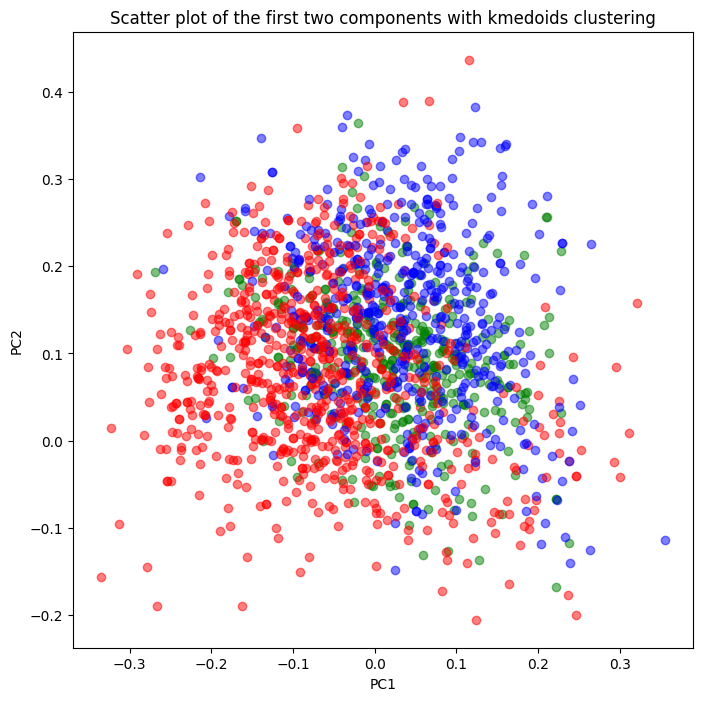

In [49]:
# Fit the model on the data
kmedoids.fit(df3_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(kmedoids_labels)):
    if kmedoids_labels[i] == 0:
        ax.scatter(df3_embeddings.iloc[i, 0], df3_embeddings.iloc[i, 1], c='r', alpha=0.5)
    elif kmedoids_labels[i] == 1:
        ax.scatter(df3_embeddings.iloc[i, 0], df3_embeddings.iloc[i, 1], c='g', alpha=0.5)
    elif kmedoids_labels[i] == 2:
        ax.scatter(df3_embeddings.iloc[i, 0], df3_embeddings.iloc[i, 1], c='b', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of the first two components with kmedoids clustering')
plt.show()

In [50]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_pca)
print("ARI:", ari_kmoids_pca)

NMI: 0.5880756813049308
ARI: 0.4679746228008977


Lorsque nous avons appliqué PCA pour réduire la dimensionnalité des embeddings de notre dataset, nous n'avons pas observé des améliorations significatives de l'ARI et du NMI par rapport à l'espace original.

#### sur l’espace réduit avec t-SNE:

In [51]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df3_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b', 'y', 'c']

# Loop over each cluster and plot the points
for i in range(5):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df3_tsne.iloc[cluster_indices]['x'], 
               df3_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [52]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_tsne)
print("ARI:", ari_kmoids_tsne)

NMI: 0.860507568472279
ARI: 0.8818830908475381


Nous avons également constaté que les résultats de Kmedoids étaient meilleurs avec t-SNE qu'avec PCA en termes de NMI et d'ARI. Les résultats ont montré que la visualisation t-SNE a permis de mieux séparer les classes, ce qui a conduit à une meilleure performance de Kmedoids pour la classification non supervisée. En revanche, avec PCA, les classes ont tendance à se chevaucher, ce qui rend la tâche de classification plus difficile.

#### sur l’espace réduit avec UMAP:

In [53]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df3_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [54]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_umap)
print("ARI:", ari_kmoids_umap)

NMI: 0.7822649424499447
ARI: 0.6959382499140514


On peut les résultats ont dégradé avec UMAP par rapport à celles de t-SNE en termes de NMI et d'ARI. Cela montre que t-SNE est une méthode plus efficace pour la réduction de dimensionnalité que UMAP dans notre cas.

#### sur l’espace réduit avec un Autoencodeur:

In [55]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df3_encoded.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [56]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI:", nmi_kmoids_auto)
print("ARI:", ari_kmoids_auto)

NMI: 0.22569801559852445
ARI: 0.17719019569954392


Il semble que les résultats de NMI et ARI obtenus avec l'autoencodeur soient très faibles. Cela peut être dû à plusieurs facteurs, notamment:

1.   Le choix de la taille de l'espace latent (encoding_dim) peut ne pas être optimal pour la tâche de clustering.


2.   Le choix de la fonction de perte (loss) peut ne pas être adapté à la tâche de clustering.


3. Le nombre d'itérations d'entraînement (epochs) peut ne pas être suffisant pour que le modèle capture correctement les structures dans les données.
Il peut être intéressant d'expérimenter avec différentes valeurs pour ces paramètres et de voir si les résultats s'améliorent.

### spherical Kmeans:

#### sur l’espace d’origine:

In [57]:
# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)

# Convert DataFrame to NumPy array
X = df3_embeddings.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_org = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_org = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_org)
print("ARI:", ari_ksph_org)

 == New init == 
iteration: 0
2102.03617899199
iteration: 1
2138.782820569754
iteration: 2
2142.7426392724446
iteration: 3
2144.167394689664
iteration: 4
2146.596134940895
iteration: 5
2148.589175725442
iteration: 6
2150.4781349403925
iteration: 7
2151.5905572326333
iteration: 8
2151.737066159705
iteration: 9
2151.7558529408184
iteration: 10
2151.758888080878
iteration: 11
2151.760050419604
iteration: 12
2151.760247915353
iteration: 13
2151.7608315607094
iteration: 14
NMI: 0.7639949279180364
ARI: 0.7722340833537154


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids.

#### sur l’espace réduit avec l'ACP:

In [58]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df3_pca.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_pca)
print("ARI:", ari_ksph_pca)

 == New init == 
iteration: 0
813.1736486750289
iteration: 1
1422.5626913905471
iteration: 2
1453.3068486362808
iteration: 3
1458.7720312235115
iteration: 4
1460.5887396908756
iteration: 5
1463.2877004639267
iteration: 6
1467.682242407511
iteration: 7
1471.281836475664
iteration: 8
1474.5586433268877
iteration: 9
1475.6252964115843
iteration: 10
1475.9960498829155
iteration: 11
1476.2351955893548
iteration: 12
1476.2876594413628
iteration: 13
1476.334451771045
iteration: 14
1476.360394875653
iteration: 15
1476.3669101639678
iteration: 16
1476.4018627316532
iteration: 17
1476.4059754767766
iteration: 18
NMI: 0.6252736822466616
ARI: 0.5869454862408106


#### sur l’espace réduit avec t-SNE:

In [59]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df3_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_tsne)
print("ARI:", ari_ksph_tsne)

 == New init == 
iteration: 0
1401.2838183303525
iteration: 1
1889.3851062091508
iteration: 2
1995.855795924832
iteration: 3
2028.3136799816905
iteration: 4
2049.657771634579
iteration: 5
2061.803158263947
iteration: 6
2076.3996753033007
iteration: 7
2096.151100334037
iteration: 8
2110.8652282746557
iteration: 9
2128.2913361606306
iteration: 10
2137.517220276272
iteration: 11
2139.5552251138724
iteration: 12
2139.8697287016657
iteration: 13
2139.8979809252387
iteration: 14
2139.903495343003
iteration: 15
2139.904215610768
iteration: 16
NMI: 0.8047935657150782
ARI: 0.8127364054356228


#### sur l’espace réduit avec UMAP:

In [60]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df3_umap.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_umap)
print("ARI:", ari_ksph_umap)

 == New init == 
iteration: 0
2152.6190478254143
iteration: 1
2216.63945075812
iteration: 2
NMI: 0.7386633796950347
ARI: 0.608385628475912


#### sur l’espace réduit avec un Autoencodeur:

In [61]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df3_encoded.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_


nmi_ksph_auto = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_auto = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI:", nmi_ksph_auto)
print("ARI:", ari_ksph_auto)

 == New init == 
iteration: 0
1950.4342816138412
iteration: 1
2023.7658591409345
iteration: 2
2033.2363273642554
iteration: 3
2038.4831533899614
iteration: 4
2042.4167453405335
iteration: 5
2044.5213083933938
iteration: 6
2047.6928079884838
iteration: 7
2051.7581786869932
iteration: 8
2053.638958935957
iteration: 9
2054.483546799041
iteration: 10
2054.8290715473195
iteration: 11
2054.9513071475103
iteration: 12
2054.9932437539596
iteration: 13
2054.9994760053696
iteration: 14
2055.0006941607385
iteration: 15
2055.002736726368
iteration: 16
2055.0041867127275
iteration: 17
NMI: 0.7999515440576619
ARI: 0.8288526967612482


En résumé, après avoir appliqué SphericalKMeans sur les données en utilisant à la fois l'espace original et les espaces réduits, nous avons constaté que le SphericalKMeans avait de bons résultats sur tous les espaces, tandis que UMAP et l'autoencodeur ont produit des espaces avec des ARI et des NMI plus élevés pour tous les algorithmes.

### CAH:

#### sur l'espace d'origine:

In [62]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.7151958437860699
NMI score: 0.7184460960944
-------------------------------
Linkage method: complete
ARI score: 0.42500079800333934
NMI score: 0.529642474367653
-------------------------------
Linkage method: average
ARI score: -0.00015925519904865784
NMI score: 0.006007604597856825
-------------------------------
Linkage method: single
ARI score: -0.0002364756324108783
NMI score: 0.0032764934797992447
-------------------------------


#### sur l'espace réduit avec l"ACP:

In [63]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.7430874775124661
NMI score: 0.7412492699133055
-------------------------------
Linkage method: complete
ARI score: 0.35515721452368637
NMI score: 0.47560511639548353
-------------------------------
Linkage method: average
ARI score: 0.29219936680349107
NMI score: 0.43625980935411
-------------------------------
Linkage method: single
ARI score: -7.629838492837493e-05
NMI score: 0.004351217414609548
-------------------------------


#### sur l'espace réduit avec t-SNE:

In [64]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.8700904765078182
NMI score: 0.8469458692610599
-------------------------------
Linkage method: complete
ARI score: 0.7708726644883597
NMI score: 0.7855043476427402
-------------------------------
Linkage method: average
ARI score: 0.8096775554831804
NMI score: 0.7865136488510995
-------------------------------
Linkage method: single
ARI score: 0.24231981628500981
NMI score: 0.4862663995649792
-------------------------------


#### sur l'espace réduit avec UMAP:

In [65]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.8644719064712376
NMI score: 0.8626280031098563
-------------------------------
Linkage method: complete
ARI score: 0.8988082360089191
NMI score: 0.8825677474654036
-------------------------------
Linkage method: average
ARI score: 0.8927686279590006
NMI score: 0.8742774165091629
-------------------------------
Linkage method: single
ARI score: 0.5892047328371354
NMI score: 0.7213128135003135
-------------------------------


En effet, dans l'espace réduit par UMAP, nous observons que les résultats des quatre méthodes de liaison sont très similaires, avec des scores ARI et NMI élevés pour toutes les méthodes. Cela peut être dû au fait que cette distribution de données est bien séparée et que l'effet de chaîne n'est peut-être pas présent, ce qui rend les résultats moins sensibles au choix de la méthode de liaison. De plus, il est possible que la méthode de lien Single donne des résultats catastrophiques pour les autres espaces, car elle peut être très sensible aux valeurs aberrantes et à l'existence de groupes dispersés. Dans cet espace réduit par UMAP, il se peut que ces facteurs n'affectent pas autant la performance de la méthode de liaison Single, conduisant ainsi à des résultats similaires à ceux des autres méthodes de liaison.

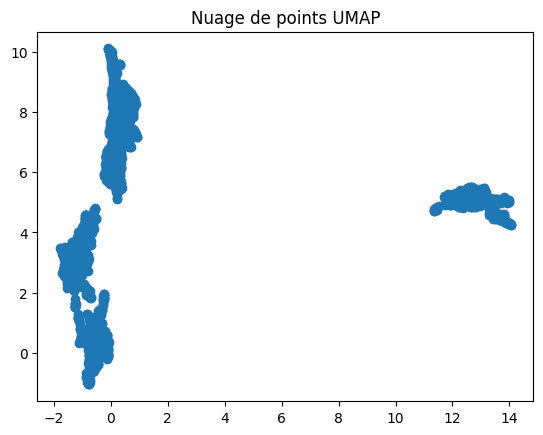

In [66]:
plt.scatter(df3_umap.iloc[:, 0], df3_umap.iloc[:, 1])
plt.title("Nuage de points UMAP")
plt.show()

#### sur l'espace réduit avec un Autoencodeur:

In [67]:
# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.6989933802384519
NMI score: 0.6981082302438103
-------------------------------
Linkage method: complete
ARI score: 0.04485751633706296
NMI score: 0.16287774674808628
-------------------------------
Linkage method: average
ARI score: -0.0011042594157367905
NMI score: 0.04268500739774801
-------------------------------
Linkage method: single
ARI score: -4.476631239190195e-05
NMI score: 0.004394696100971777
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original et dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, il est important de noter que la méthode de liaison "single" a obtenu les pires résultats dans toutes les situations. Ceci peut être dû à l'effet de chaîne, où chaque nouvel élément est fusionné avec le groupe le plus proche, sans tenir compte de la structure globale des données. Les meilleurs résultats ont été obtenus dans l'espace réduit par UMAP et t-SNE, comme pour les autres méthodes de clustering.

En somme, les résultats de la CAH ont montré que la méthode de liaison "ward" est la plus appropriée pour les données de notre ensemble de données, et que les espaces réduits par UMAP et t-SNE offrent des résultats de clustering similaires aux autres méthodes. Ces résultats suggèrent que la combinaison de techniques de réduction de dimensionnalité et de clustering peut être une approche efficace pour explorer la structure de données complexes et faciliter l'analyse de grandes quantités de données.

In [68]:
# récuperer les meilleurs scores pour chaque espace.

ari_cah_org=0.7151958437860699
nmi_cah_org=0.7184460960944

ari_cah_pca=0.6769774579397424
nmi_cah_pca=0.6952772852980489

ari_cah_tsne=0.8639906865256388
nmi_cah_tsne=0.8421041687735199

ari_cah_umap=0.8940795274261595
nmi_cah_umap=0.8776939063303287

ari_cah_auto=0.5883582825787853
nmi_cah_auto=0.682001849854721

### Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [69]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['org', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method       CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                      
auto    0.588358  0.177190  0.667003        0.828853  0.682002  0.225698   
org     0.715196  0.513019  0.760588        0.772234  0.718446  0.554528   
pca     0.676977  0.467975  0.756812        0.586945  0.695277  0.588076   
tsne    0.863991  0.881883  0.880904        0.812736  0.842104  0.860508   
umap    0.894080  0.695938  0.897971        0.608386  0.877694  0.782265   

                                  
method  KMeans++ KMeansSpherical  
space                             
auto    0.684218        0.799952  
org     0.751801        0.763995  
pca     0.749865        0.625274  
tsne    0.860291        0.804794  
umap    0.877734        0.738663

<Figure size 1000x600 with 0 Axes>

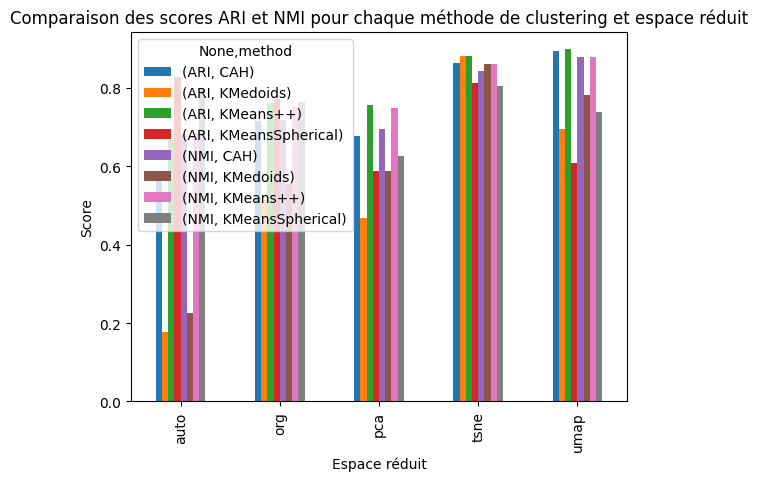

In [70]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode "KMedoids" a donné les meilleurs résultats dans l'espace réduit par t-SNE en termes de scores ARI et NMI pour la plupart des espaces réduits.



### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode KMedoids dans l'espace T-SNE, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

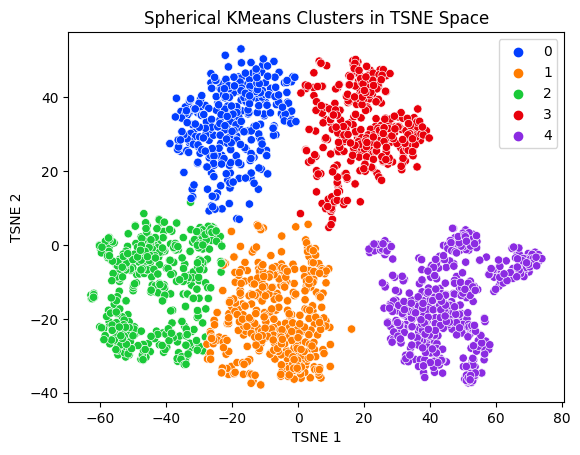

In [71]:
# Fit kmedoids on t-SNE embeddings
kmedoids.fit(df3_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

# Convert DataFrame to NumPy array
X = df3_tsne.iloc[:, :-1].to_numpy()

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df3_tsne.iloc[:, 0], y=df3_tsne.iloc[:, 1], hue=kmedoids_labels, palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Spherical KMeans Clusters in TSNE Space')

# Show the plot
plt.show()

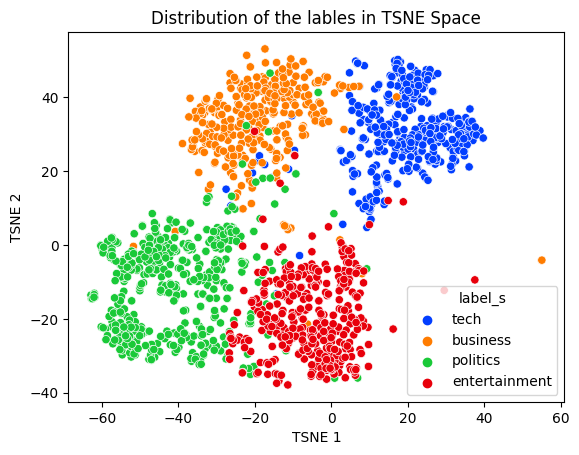

In [80]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df3_tsne.iloc[:, 0], y=df3_tsne.iloc[:, 1], hue=df3['label_s'], palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Distribution of the lables in TSNE Space')

# Show the plot
plt.show()

En examinant les deux nuages de points, nous pouvons remarquer que les points du **cluster 0**  correspondent à la classe **"business"** dans la variable **"label"** de notre dataframe. De même, les points du **cluster 3** correspondent à la classe **"tech"**,les points du **cluster 2** correspondent à la classe **"politics"**,les points du **cluster 4** correspondent à la classe **"sport"**. Enfin, les points du **cluster 1** correspondent à la classe **"entertainment"**. 

Ces observations indiquent que le clustering a réussi à regrouper les données en fonction de leur appartenance à l'une des trois classes de la variable "label". Cela montre que le modèle de clustering KMedoids appliqué sur l'espace TSNE a été efficace pour séparer les données en fonction de leurs caractéristiques, en permettant d'identifier des groupes similaires au sein de chaque classe.

In [73]:
df3['cluster']=spherical_kmeans_labels
df3.head()

text  label  \
0  England coach faces rap after row\n\nEngland c...  sport   
1  Moody joins up with England\n\nLewis Moody has...  sport   
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport   
3  Henry tipped for Fifa award\n\nFifa president ...  sport   
4  Arnesen denies rift with Santini\n\nTottenham ...  sport   

                                 preprocessed_review  cluster  
0  england coach face rap row england coach andy ...        4  
1  moody join england lewis moody flown dublin jo...        4  
2  ferguson fear milan cutting edge manchester un...        4  
3  henry tipped fifa award fifa president sepp bl...        4  
4  arnesen denies rift santini tottenham sporting...        4

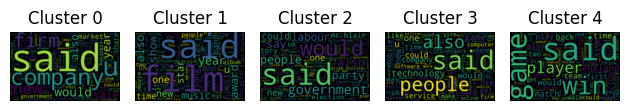

In [74]:
# Définir les trois clusters
clusters = [0, 1, 2, 3, 4]

# Boucle pour créer les nuages de mots pour chaque cluster
for i, c in enumerate(clusters):
    
    # Sélectionner les reviews du cluster
    words_list = df3[df3['cluster'] == c]['preprocessed_review'].unique().tolist()
    words = " ".join(words_list)
    
    # Créer le nuage de mots pour le cluster
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(words)
    
    # Créer le subplot correspondant au cluster
    plt.subplot(1, 5, i+1)
    
    # Afficher le nuage de mots sur le subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    
# Afficher la figure
plt.tight_layout()
plt.show()

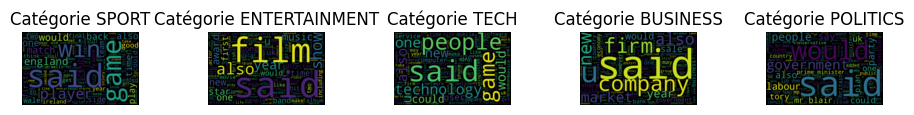

In [75]:
# Define the categories
categories = df3['label'].unique()

# Create a dictionary to store the word clouds for each category
wordclouds = {}

# Loop through the categories and create a word cloud for each one
for category in categories:
    words_list = df3[df3['label'] == category]['preprocessed_review'].unique().tolist()
    pos_words = " ".join(words_list)
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)
    wordclouds[category] = wordcloud

# Display the word clouds
fig, axs = plt.subplots(1, len(categories), figsize=(10, 4))
for i, category in enumerate(categories):
    axs[i].imshow(wordclouds[category], interpolation='bilinear')
    axs[i].set_title(f'Catégorie {category.upper()}')
    axs[i].axis("off")
plt.tight_layout(pad=5)
plt.show()

Après avoir effectué l'analyse de distribution des mots sur les cinq classes on constate que les mots fréquents du **cluster 0**  correspondent à la classe **"business"** dans la variable **"label"** de notre dataframe. De même, les mots fréquents du **cluster 3** correspondent à la classe **"tech"**,les mots fréquents du **cluster 2** correspondent à la classe **"politics"**,les mots fréquents du **cluster 4** correspondent à la classe **"sport"**. Enfin, les mots fréquents du **cluster 1** correspondent à la classe **"entertainment"**. 

In [76]:
# Assign numerical values to the label column
df3['label_num'] = df3['label'].map({'business': 0, 'tech': 3, 'politics': 2, 'sport':4, 'entertainment':1})

# Create confusion matrix between label_num and cluster columns
conf_mat = confusion_matrix(df3['label_num'], df3['cluster'])

# Calculate accuracy score
accuracy = accuracy_score(df3['label_num'], df3['cluster'])

print("Confusion matrix:")
print(conf_mat)
print("Accuracy:", accuracy)

Confusion matrix:
[[460   0  34  16   0]
 [  4 349   9  24   0]
 [ 11   0 397   6   3]
 [  5   6  12 375   3]
 [  2   2  21   4 482]]
Accuracy: 0.927191011235955


Après ce calcul avec une accuracy, on peut être certain que le **cluster 0**  correspond à la classe **"business"** le **cluster 3** correspond à la classe **"tech"**, le **cluster 2** correspond à la classe **"politics"**,le **cluster 4** correspond à la classe **"sport"**. Enfin, le **cluster 1** correspond à la classe **"entertainment"**. 

### Choix du nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

#### Elbow Method:

Le "elbow method" est une technique couramment utilisée dans l'analyse de cluster pour déterminer le nombre optimal de clusters à utiliser pour un ensemble de données donné. Cette méthode implique de tracer le taux de variation expliqué par rapport au nombre de clusters, et de chercher le point où la courbe forme un coude, ou "elbow" en anglais. Ce point est considéré comme le nombre optimal de clusters à utiliser.

##### sur l'espace d'origine:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

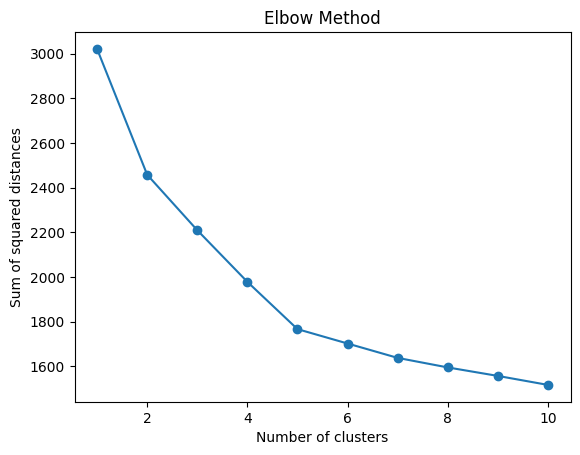

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec l'ACP:

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec t-SNE:

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec UMAP:

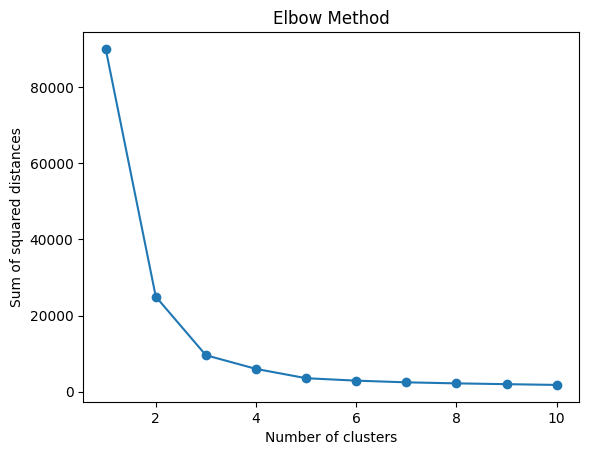

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

##### sur l'espace réduit avec un autencodeur:

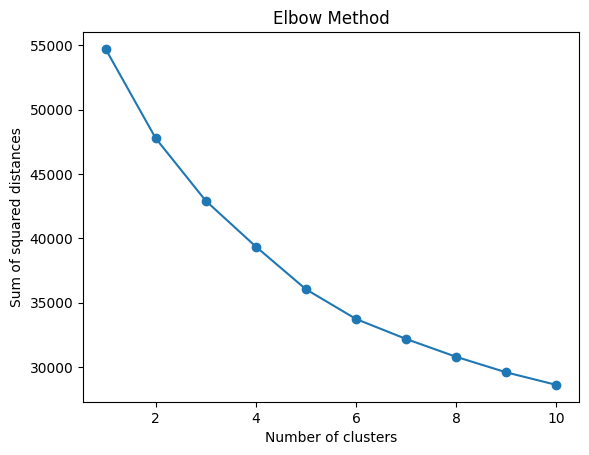

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

D'après les résultats de l'analyse avec la méthode Elbow, il a été déterminé que le nombre de clusters optimal pour les données de notre ensemble de données était de cinq. Ce résultat a été observé sur l'ensemble des espaces d'origine, ACP et t_SNE.

#### Silhouette Method:

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

###### sur l'espace réduit par l'ACP:

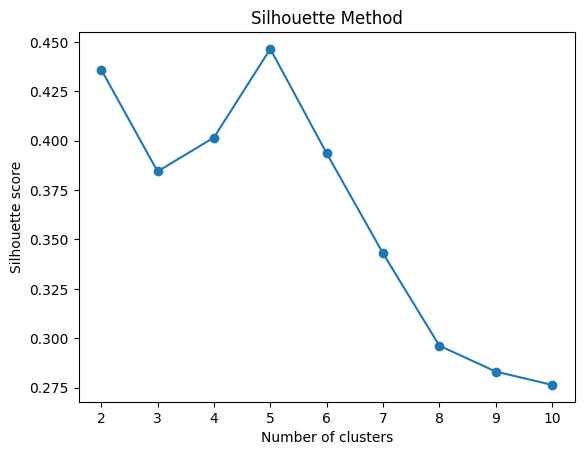

In [ ]:
# Convert DataFrame to NumPy array
X = df3_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par t-SNE:

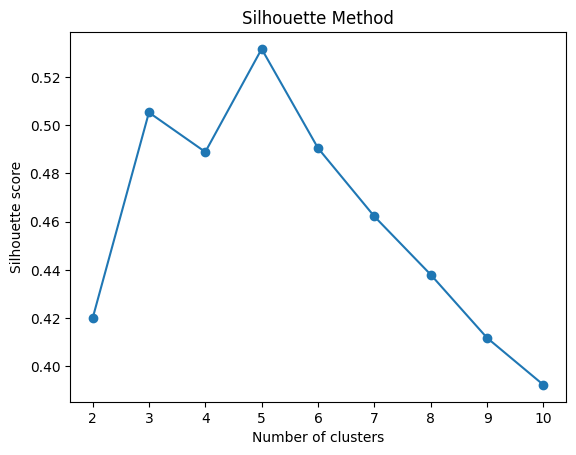

In [ ]:
# Convert DataFrame to NumPy array
X = df3_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()


###### sur l'espace réduit par UMAP:

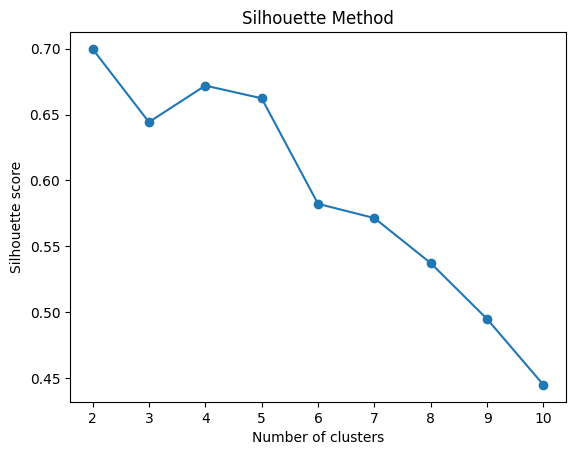

In [ ]:
# Convert DataFrame to NumPy array
X = df3_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

###### sur l'espace réduit par un autoencodeur:

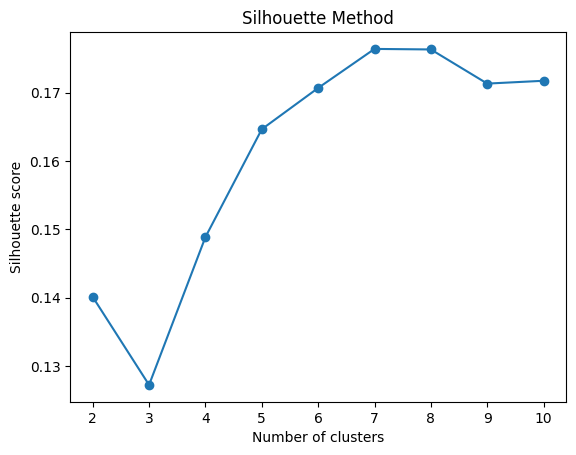

In [ ]:
# Convert DataFrame to NumPy array
X = df3_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

En utilisant la méthode de Silhouette, nous avons également constaté que le nombre optimal de clusters pour notre ensemble de données est de cinq (sauf pour l'autoencodeur). La valeur moyenne de silhouette est maximisée pour 5 clusters, ce qui indique que chaque point de données est bien assigné à son cluster et que les clusters sont suffisamment séparés les uns des autres. Par conséquent, nous pouvons conclure que le nombre optimal de clusters pour notre ensemble de données est de trois, selon les résultats obtenus à la fois par la méthode de Silhouette et la méthode du coude.

## Partie 2 : Approche jointe/simultanée

### Reduced k-means

In [ ]:
df3_embeddings.to_csv('R/df3_embeddings.csv')

In [ ]:
with open("R/df3_cluster_labels.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '4', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1',

In [ ]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

NMI: 0.7496307543093156
ARI: 0.7557116551884077


En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats sont identiques à ceux obtenus en appliquant la réduction de dimension avec PCA, puis en appliquant K-means++ avec NMI : 0,817 et ARI : 0,870. Cela démontre l'efficacité de la fonction cluspca dans la combinaison de ces deux méthodes. En effet, cluspca utilise la PCA pour réduire la dimensionnalité de la donnée numérique, puis applique une méthode de clustering sur les composantes principales pour trouver les groupes similaires. Ces résultats confirment la validité de l'approche cluspca et montrent clairement comment cette méthode fonctionne.

In [ ]:
# setting df1 to default
df3=df3[['text'	,'label'	,'preprocessed_review']]

In [ ]:
df3['RKM_cluster']=RKM_labels
df3['RKM_cluster'] = df3['RKM_cluster'].astype(int)
df3.head()

text  label  \
0  England coach faces rap after row\n\nEngland c...  sport   
1  Moody joins up with England\n\nLewis Moody has...  sport   
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport   
3  Henry tipped for Fifa award\n\nFifa president ...  sport   
4  Arnesen denies rift with Santini\n\nTottenham ...  sport   

                                 preprocessed_review  RKM_cluster  
0  england coach face rap row england coach andy ...            1  
1  moody join england lewis moody flown dublin jo...            1  
2  ferguson fear milan cutting edge manchester un...            1  
3  henry tipped fifa award fifa president sepp bl...            1  
4  arnesen denies rift santini tottenham sporting...            0

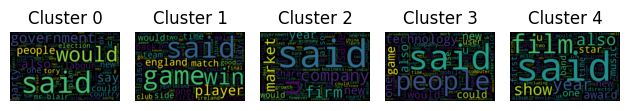

In [ ]:
# Définir les trois clusters
clusters = [0, 1, 2, 3, 4]

# Boucle pour créer les nuages de mots pour chaque cluster
for i, c in enumerate(clusters):
    
    # Sélectionner les reviews du cluster
    words_list = df3[df3['RKM_cluster'] == c]['preprocessed_review'].unique().tolist()
    words = " ".join(words_list)
    
    # Créer le nuage de mots pour le cluster
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(words)
    
    # Créer le subplot correspondant au cluster
    plt.subplot(1, 5, i+1)
    
    # Afficher le nuage de mots sur le subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    
# Afficher la figure
plt.tight_layout()
plt.show()

In [ ]:
# Define the categories
categories = df3['label'].unique()

# Create a dictionary to store the word clouds for each category
wordclouds = {}

# Loop through the categories and create a word cloud for each one
for category in categories:
    words_list = df3[df3['label'] == category]['preprocessed_review'].unique().tolist()
    pos_words = " ".join(words_list)
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)
    wordclouds[category] = wordcloud

# Display the word clouds
fig, axs = plt.subplots(1, len(categories), figsize=(10, 4))
for i, category in enumerate(categories):
    axs[i].imshow(wordclouds[category], interpolation='bilinear')
    axs[i].set_title(f'Catégorie {category.upper()}')
    axs[i].axis("off")
plt.tight_layout(pad=3)
plt.show()

Après avoir effectué l'analyse de distribution des mots sur les cinq classes on constate que les mots fréquents du **cluster 2**  correspondent à la classe **"business"** dans la variable **"label"** de notre dataframe. De même, les mots fréquents du **cluster 3** correspondent à la classe **"tech"**,les mots fréquents du **cluster 0** correspondent à la classe **"politics"**,les mots fréquents du **cluster 1** correspondent à la classe **"sport"**. Enfin, les mots fréquents du **cluster 4** correspondent à la classe **"entertainment"**. 

In [ ]:
# Assign numerical values to the label column
df3['label_num'] = df3['label'].map({'business': 2, 'tech': 3, 'politics': 0, 'sport':1, 'entertainment':4})

# Create confusion matrix between label_num and cluster columns
conf_mat = confusion_matrix(df3['label_num'], df3['RKM_cluster'])

# Calculate accuracy score
accuracy = accuracy_score(df3['label_num'], df3['RKM_cluster'])

print("Confusion matrix:")
print(conf_mat)
print("Accuracy:", accuracy)

Confusion matrix:
[[404   1   7   3   2]
 [ 34 474   1   0   2]
 [ 80   0 415  14   1]
 [ 19   4   8 359  11]
 [ 21   1   6  18 340]]
Accuracy: 0.8952808988764045


La confusion matrix permet de visualiser les performances du modèle de clustering en montrant le nombre de prédictions correctes et incorrectes pour chaque classe. Dans ce cas, la matrice de confusion montre que le modèle a correctement prédit la classe pour la plupart des points de données, avec un taux d'exactitude global de 0,895.

Donc, l'utilisation de la méthode cluspca permet de gagner du temps en produisant des résultats précis et cohérents avec les données. Cependant, il est également possible de réaliser la réduction de dimension manuellement en utilisant différentes méthodes et de combiner ces résultats avec des méthodes de clustering variées. Bien que cela puisse prendre plus de temps, cela offre une opportunité d'optimiser le travail en choisissant la méthode la plus appropriée pour les données et en obtenant des résultats encore meilleurs. Tout dépend des besoins et des contraintes de chaque projet.

### Deep k-means

In [ ]:
# Load the dataset
df1_embeddings.to_csv('df1_embeddings.csv')

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier **dkm.py** ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py

Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d BBC -p`**

On a eu un ARI = 0.82, un NMI = 0,81 et une accuracy de 0.92

dkm_df3.png

Les résultats obtenus avec cette méthode sont globalement satisfaisants. Cependant, il est important de souligner que cette méthode est relativement complexe, notamment en termes de temps d'exécution. De plus, nous ne sommes pas encore très familiers avec les concepts sous-jacents du deep learning, ce qui peut rendre la mise en œuvre de cette méthode plus difficile pour nous.

En outre, il convient de noter que les méthodes classiques semblent fournir de meilleurs résultats en termes de NMI, ARI et accuracy. C'est pourquoi nous avons finalement opté pour l'utilisation de ces méthodes plus traditionnelles dans notre étude. Toutefois, cela ne signifie pas que nous excluons la possibilité d'utiliser des méthodes de deep learning à l'avenir si cela s'avère nécessaire ou pertinent pour nos travaux futurs.

# Conclusion

Dans ce projet, nous avons appris deux approches de clustering. La première approche consiste à utiliser des méthodes de réduction de dimension pour ensuite appliquer un algorithme de clustering. Cette approche est également connue sous le nom d'approche en tandem. La deuxième approche consiste à utiliser des algorithmes qui combinent à la fois la réduction de dimension et le clustering. Cette approche est également connue sous le nom d'approche jointe.

Pour la réalisation de ce projet, nous avons utilisé 3 ensembles de données : "classic3", "classic4" et "BBC". Chaque ensemble de données est constitué d'une colonne texte contenant des articles et d'une colonne label contenant la catégorie de chaque article. L'objectif de ce travail était de réaliser un clustering des articles, puis d'évaluer la performance du modèle en utilisant les labels.

Pour la première approche (approche tandem), nous avons utilisé trois méthodes de réduction de dimension différentes : la méthode PCA, t-SNE, UMAP ainsi qu'un autoencodeur. Nous avons également utilisé l'espace d'origine sans l'application de réduction. Pour chaque méthode, nous avons appliqué quatre algorithmes de clustering différents : Kmeans++, Kmedoids, Spherical Kmeans et CAH avec ses différents linkages. Nous avons ensuite évaluer la performance de chaque algorithme dans chaque espace en utilisant les métrique NMI et ARI.

- Pour le premier dataset (classic3), nous avons choisi de fixer le nombre de clusters à trois car nous avions trois labels différents. Nous avons obtenu de bons scores de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode qui a donné les résultats les plus élevés était le K-means sphérique dans l'espace t-SNE. Cela suggère que les données ont des similitudes ou des caractéristiques communes qui peuvent être utilisées pour les regrouper en différents clusters. Pour nous assurer que nous avions choisi le bon nombre de clusters, nous avons utilisé les deux méthodes : la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method), qui ont confirmé notre choix. 
- Pour le deuxième dataset (classic4) nous avons choisi de fixer le nombre de clusters à quatre car nous avions quatre labels différents. Nous avons obtenu des scores non satisfaisant de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode CAH a donné les meilleurs résultats en termes de scores NMI dans l'espace réduit t-SNE et Spherical Kmeans a donné les meilleurs résultat en terme de score ARI dans l'espace réduit UMAP.
Ces résultats suggére que les données ne sont pas naturellement divisibles en clusters distincts, ce que nous avons remarqué grâce aux plot plus haut.  Pour nous assurer que nous avions choisi le bon nombre de clusters, nous avons utilisé les deux méthodes : la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method), qui ont confirmé notre choix. 
-  Pour le troisième dataset (BBC) nous avons choisi de fixer le nombre de clusters à cinq car nous avions quatre labels différents. Nous avons obtenu des scores satisfaisant de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode KMedoids a donné les meilleurs résultats en termes de scores NMI et ARI dans l'espace réduit t-SNE.


Pour la deuxième approche (approche jointe), nous avons utilisé deux algorithmes : le Reduced Kmeans et le Deep Kmeans. L'algorithme Reduced Kmeans est disponible uniquement sous R dans la fonction cluspca(). Pour cette raison, nous avons utilisé un code R pour appliquer cet algorithme aux vecteurs d'embedding, puis nous avons récupéré les résultats du clustering de la fonction dans un fichier texte. Ensuite, nous avons évalué le modèle avec les métriques NMI et ARI sous Python. Nous avons remarqué que les résultats de cette approche ne sont pas différents des résultats de l'approche tandem. Cela est dû au fait que la fonction utilise la réduction PCA puis applique le K-means au sein de la même fonction, alors que dans l'approche tandem, cela se fait séparément.

Nous somme heureux d'avoir travaillé sur ce projet passionnant de data science et J'aimerai terminer mon projet avec une parole qui me semble de plus en plus vraie avec le temps:


In [ ]:
#!pip install pyfiglet
from pyfiglet import Figlet

f = Figlet(font='big')
quote = "Without data you're just another person with an opinion !"
ascii_art = f.renderText(quote)

print(ascii_art)

__          ___ _   _                 _         _       _        
\ \        / (_) | | |               | |       | |     | |       
 \ \  /\  / / _| |_| |__   ___  _   _| |_    __| | __ _| |_ __ _ 
  \ \/  \/ / | | __| '_ \ / _ \| | | | __|  / _` |/ _` | __/ _` |
   \  /\  /  | | |_| | | | (_) | |_| | |_  | (_| | (_| | || (_| |
    \/  \/   |_|\__|_| |_|\___/ \__,_|\__|  \__,_|\__,_|\__\__,_|
                                                                 
                                                                 
                   _              _           _   
                  ( )            (_)         | |  
 _   _  ___  _   _|/ _ __ ___     _ _   _ ___| |_ 
| | | |/ _ \| | | | | '__/ _ \   | | | | / __| __|
| |_| | (_) | |_| | | | |  __/   | | |_| \__ \ |_ 
 \__, |\___/ \__,_| |_|  \___|   | |\__,_|___/\__|
  __/ |                         _/ |              
 |___/                         |__/               
                   _   _                                        